# **Data Collection and Collaborative Environment**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive


drive.mount('/content/drive', force_remount=True)

sns.set_palette("viridis")


Mounted at /content/drive


In [350]:


# Define the dataset path on the Google Drive
file_path = '/content/drive/MyDrive/FYP Dataset/GlobalPM25-V5GL0502-Annual-1998-2023-wThresFrac.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Region,Year,Population-Weighted PM2.5 [ug/m3],Geographic-Mean PM2.5 [ug/m3],Population Coverage [%],Geographic Coverage [%],Total Population [million people],% pop >= 5 ug/m3 [%],% pop >= 10 ug/m3 [%],% pop >= 15 ug/m3 [%],% pop >= 25 ug/m3 [%],% pop >= 30 ug/m3 [%],% pop >= 35 ug/m3 [%],% pop >= 40 ug/m3 [%],% pop >= 45 ug/m3 [%],% pop >= 50 ug/m3 [%],% pop >= 55 ug/m3 [%],% pop >= 60 ug/m3 [%]
0,Aruba,1998,10.7,10.4,100.0,100.0,0.088,100.0,90.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,1999,11.5,11.2,100.0,100.0,0.088,100.0,99.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,2000,11.8,11.5,100.0,100.0,0.088,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,2001,11.5,11.2,100.0,100.0,0.090,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,2002,11.4,11.2,100.0,100.0,0.092,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The dataset contains information on PM2.5 concentrations and related metrics by region and year. Key columns include:

Region: The geographic area.

Year: The year of observation.

Population-Weighted PM2.5 [µg/m³]: PM2.5 levels weighted by population distribution.

Geographic-Mean PM2.5 [µg/m³]: PM2.5 levels averaged geographically.

Population Coverage [%] and Geographic Coverage [%]: Coverage statistics for the data.

Total Population [million people]: Population in the region for the year.

% pop >= X ug/m3 [%]: Proportions of the population exposed to PM2.5 levels exceeding specified thresholds.

# **Data Cleaning and Preprocessing**

In [351]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Handling missing values only for numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
data.loc[:, numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Detecting and removing outliers using IQR
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
data = data.loc[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encoding categorical variables (Region)
label_encoder = LabelEncoder()
data.loc[:, "Region"] = label_encoder.fit_transform(data["Region"])

# Scaling numerical features
scaler = StandardScaler()
numerical_features = [col for col in numeric_cols if col != "Year"]
data.loc[:, numerical_features] = scaler.fit_transform(data[numerical_features])

X = data.drop(columns=['Population-Weighted PM2.5 [ug/m3]'])  # Drop target variable
y = data['Population-Weighted PM2.5 [ug/m3]']

X['Region'] = X['Region'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Exploratory Data Analysis (EDA)**

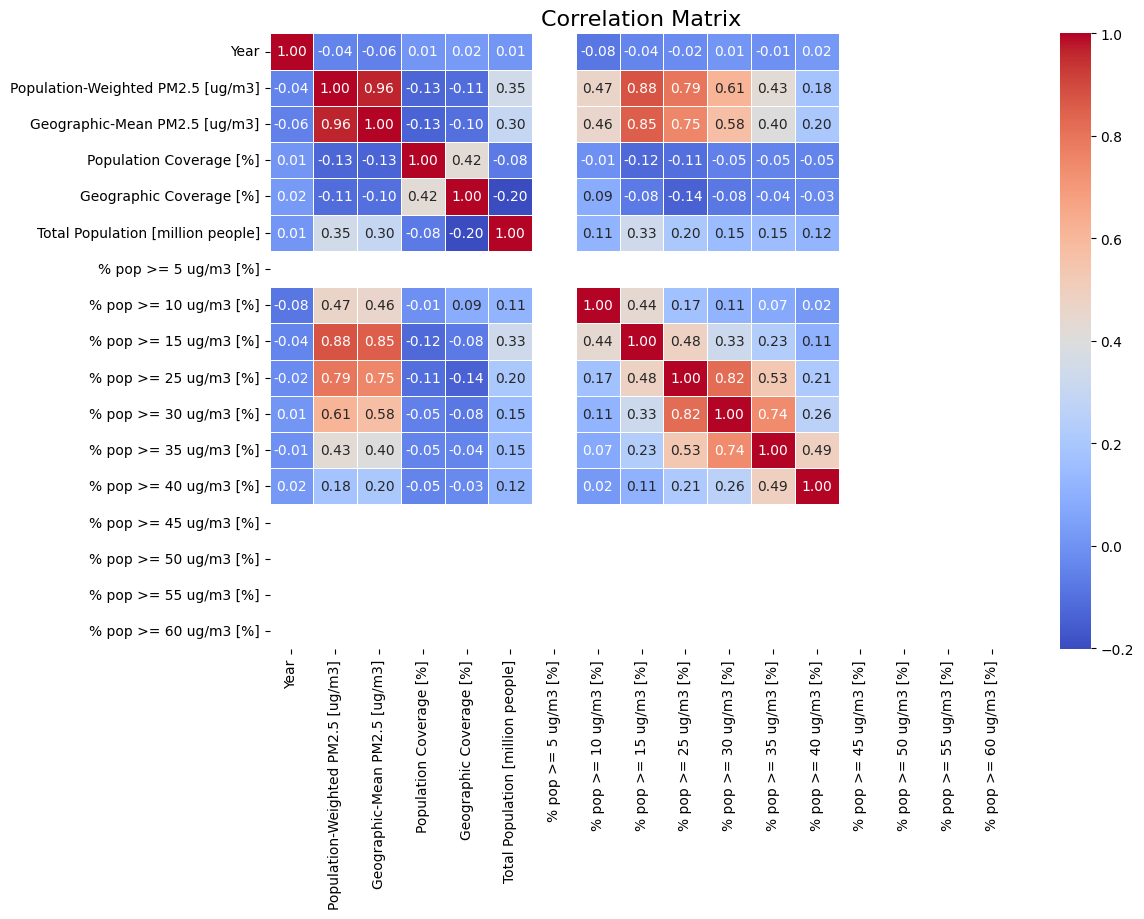

In [352]:

# Correlation heatmap
correlation_matrix = data.select_dtypes(include='number').corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


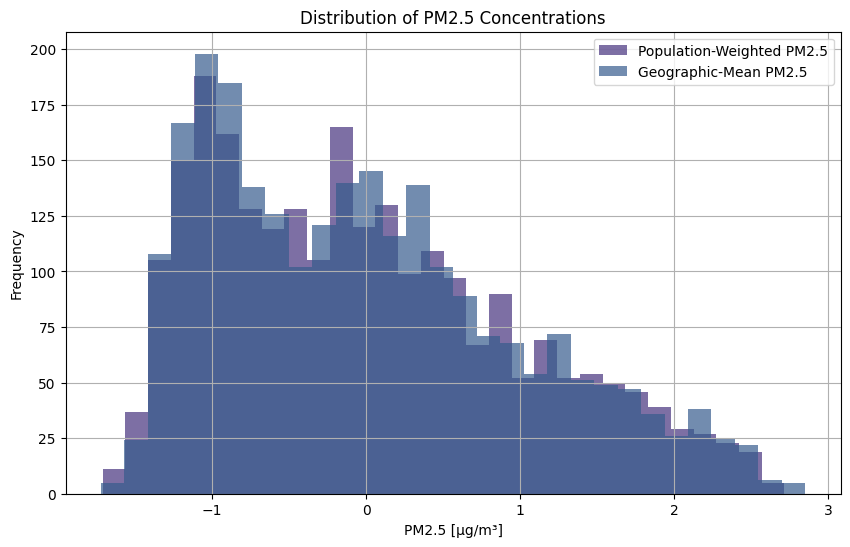

In [ ]:
# Distribution analysis for PM2.5 concentrations

# Summary statistics for population-weighted and geographic mean PM2.5
pm25_population_weighted = data['Population-Weighted PM2.5 [ug/m3]']
pm25_geographic_mean = data['Geographic-Mean PM2.5 [ug/m3]']

# Plot distribution of PM2.5 concentrations
plt.figure(figsize=(10, 6))
plt.hist(pm25_population_weighted, bins=30, alpha=0.7, label='Population-Weighted PM2.5')
plt.hist(pm25_geographic_mean, bins=30, alpha=0.7, label='Geographic-Mean PM2.5')
plt.title('Distribution of PM2.5 Concentrations')
plt.xlabel('PM2.5 [µg/m³]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


Population-weighted PM2.5 shows a sharper peak and narrower range compared to geographic-mean PM2.5. Geographic-mean PM2.5 concentrations are more spread out, indicating variability across regions.

In [355]:
# Find regions with highest and lowest population-weighted PM2.5
top_regions = data.groupby('Region')['Population-Weighted PM2.5 [ug/m3]'].mean().nlargest(5)
bottom_regions = data.groupby('Region')['Population-Weighted PM2.5 [ug/m3]'].mean().nsmallest(5)

display(top_regions)
display(bottom_regions)


,Population-Weighted PM2.5 [ug/m3]
Region,
47,2.539376
50,2.188114
36,2.173575
117,2.134029
15,1.969254


,Population-Weighted PM2.5 [ug/m3]
Region,
82,-1.652506
91,-1.593187
53,-1.415229
105,-1.415229
4,-1.385570


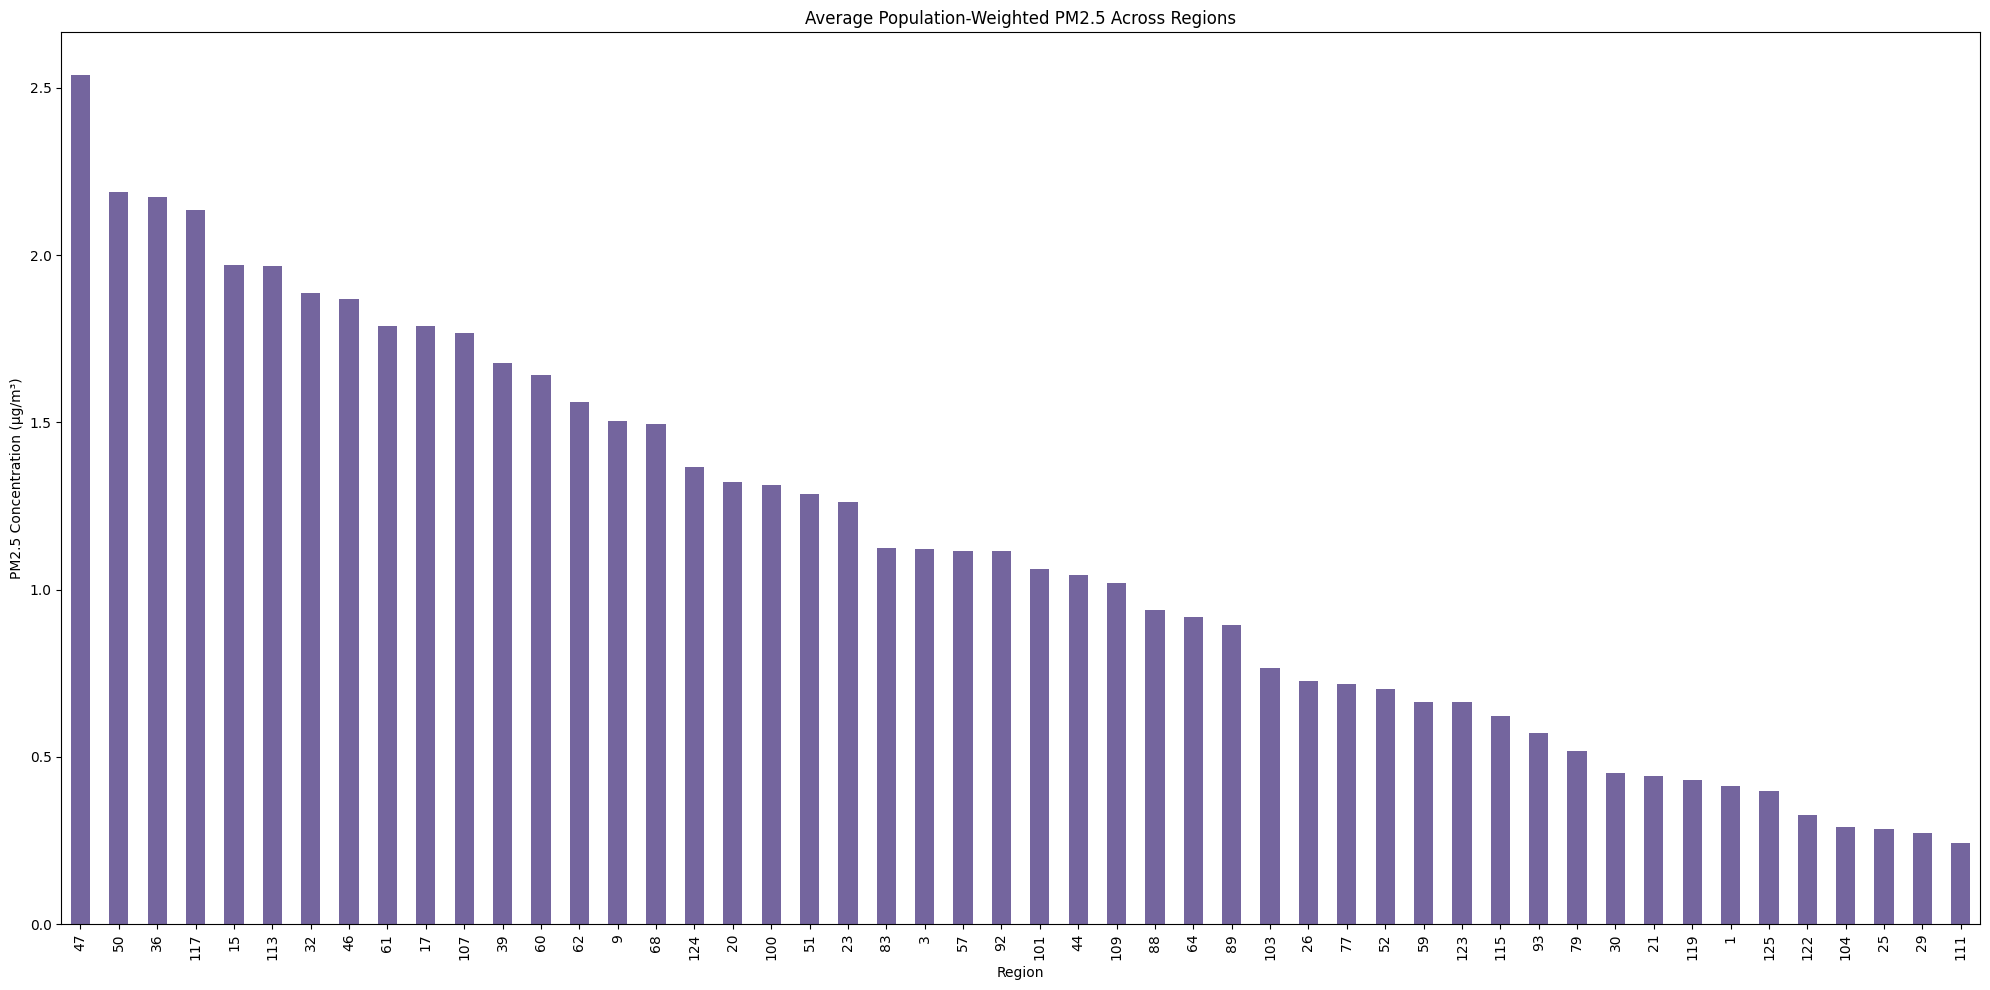

In [356]:
# a) Compare PM2.5 across all regions
region_pm25 = data.groupby('Region')[[
    'Population-Weighted PM2.5 [ug/m3]', 'Geographic-Mean PM2.5 [ug/m3]']].mean().sort_values(by='Population-Weighted PM2.5 [ug/m3]', ascending=False)

# Plot PM2.5 levels across regions
plt.figure(figsize=(20, 10))
region_pm25.head(50)['Population-Weighted PM2.5 [ug/m3]'].plot(kind='bar', alpha=0.75)
plt.title('Average Population-Weighted PM2.5 Across Regions')
plt.xlabel('Region')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


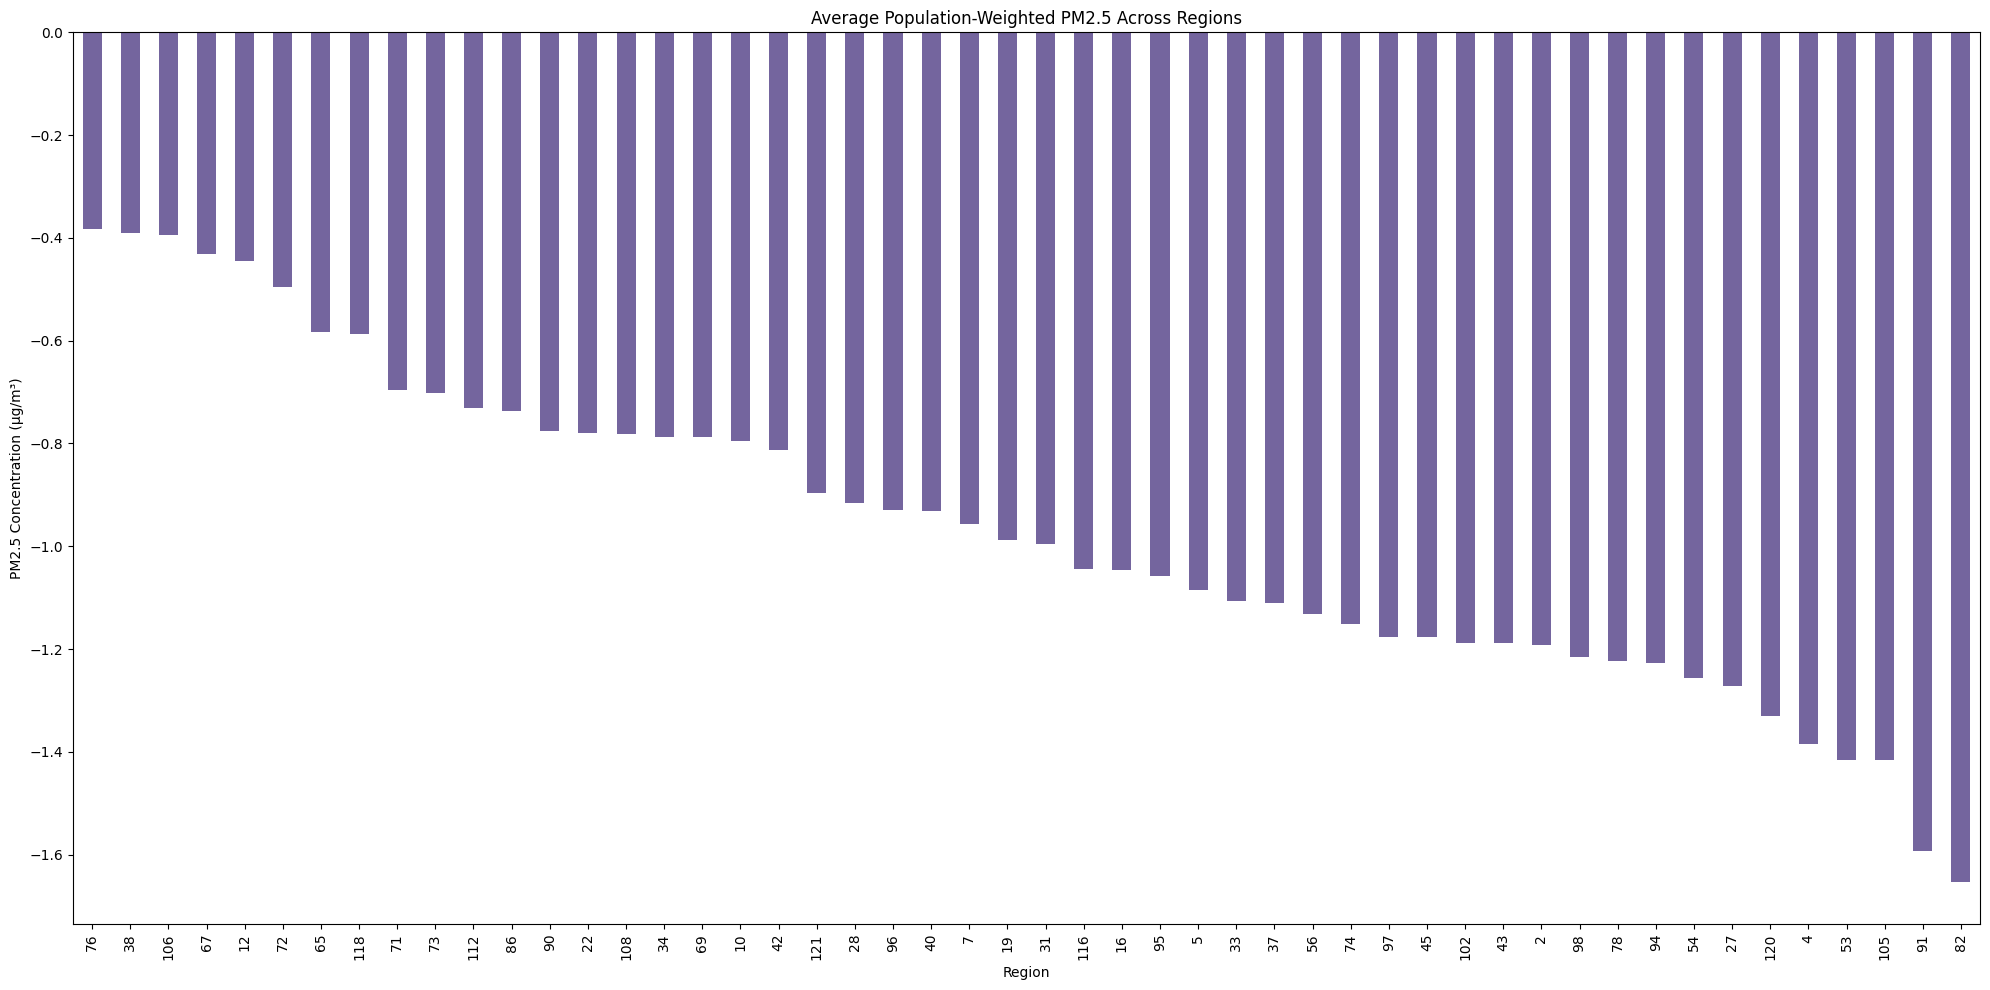

In [357]:
plt.figure(figsize=(20, 10))
region_pm25.tail(50)['Population-Weighted PM2.5 [ug/m3]'].plot(kind='bar', alpha=0.75)
plt.title('Average Population-Weighted PM2.5 Across Regions')
plt.xlabel('Region')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Which region's levels rose fastest?


In [ ]:
# Calculate the annual change in PM2.5 for each region
data['PM2.5 Change Rate'] = data.groupby('Region')['Population-Weighted PM2.5 [ug/m3]'].diff()

# Calculate the average annual change for each region
region_pm25_change = data.groupby('Region')['PM2.5 Change Rate'].mean().sort_values(ascending=False)

# Identify the region with the fastest rise in PM2.5 levels
fastest_rising_region = region_pm25_change.idxmax()
fastest_rising_value = region_pm25_change.max()


(fastest_rising_region, fastest_rising_value)


(57, 0.23727631734419297)

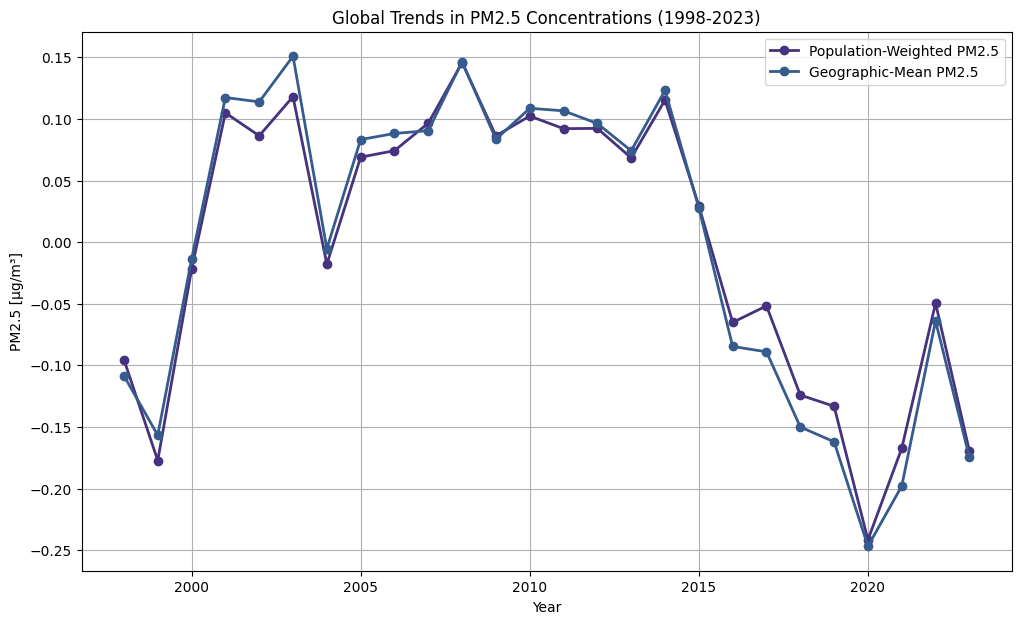

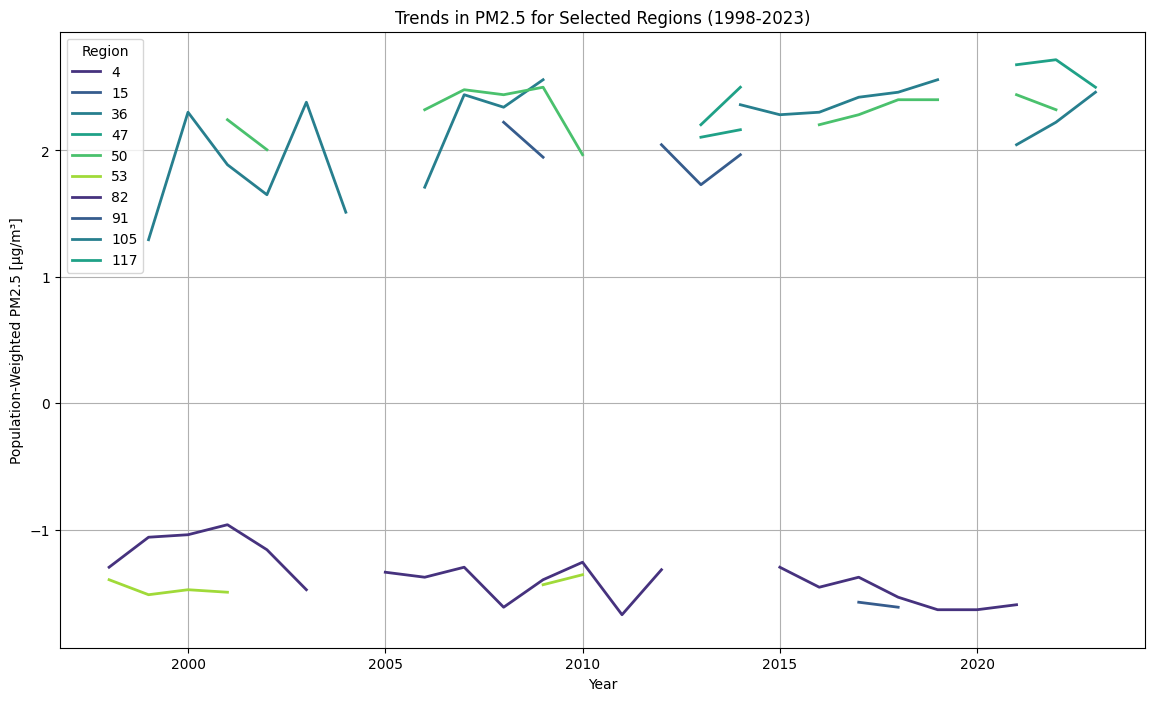

In [359]:
# Analyze trends in PM2.5 concentrations globally over time

# Group data by year to calculate global means for population-weighted and geographic mean PM2.5
global_trends = data.groupby('Year').agg({
    'Population-Weighted PM2.5 [ug/m3]': 'mean',
    'Geographic-Mean PM2.5 [ug/m3]': 'mean'
}).reset_index()

# Plot the trends
plt.figure(figsize=(12, 7))
plt.plot(global_trends['Year'], global_trends['Population-Weighted PM2.5 [ug/m3]'],
         marker='o', label='Population-Weighted PM2.5', linewidth=2)
plt.plot(global_trends['Year'], global_trends['Geographic-Mean PM2.5 [ug/m3]'],
         marker='o', label='Geographic-Mean PM2.5', linewidth=2)
plt.title('Global Trends in PM2.5 Concentrations (1998-2023)')
plt.xlabel('Year')
plt.ylabel('PM2.5 [µg/m³]')
plt.legend()
plt.grid(True)
plt.show()

# Display trends for key regions with the highest and lowest average PM2.5 levels
regions_to_highlight = top_regions.index.tolist() + bottom_regions.index.tolist()
regional_trends = data[data['Region'].isin(regions_to_highlight)].groupby(['Year', 'Region'])[
    'Population-Weighted PM2.5 [ug/m3]'].mean().unstack()

regional_trends_plot = regional_trends.plot(figsize=(14, 8), linewidth=2)
regional_trends_plot.set_title('Trends in PM2.5 for Selected Regions (1998-2023)')
regional_trends_plot.set_xlabel('Year')
regional_trends_plot.set_ylabel('Population-Weighted PM2.5 [µg/m³]')
plt.legend(title='Region')
plt.grid(True)
plt.show()


Observed Trends in PM2.5 Concentrations:
Global Trends:

The Population-Weighted PM2.5 and Geographic-Mean PM2.5 showed distinct patterns over time.
Overall, both measures demonstrate fluctuations, with potential peaks and declines in specific years, indicating varying air quality trends.
Trends in Key Regions:

Regions with the highest PM2.5 concentrations (e.g., Qatar, Niger, Saudi Arabia) exhibit consistently high levels, with some variation over the years.
Regions with the lowest PM2.5 concentrations (e.g., Greenland, Northern Mariana Islands) show relatively stable and low levels over the years.


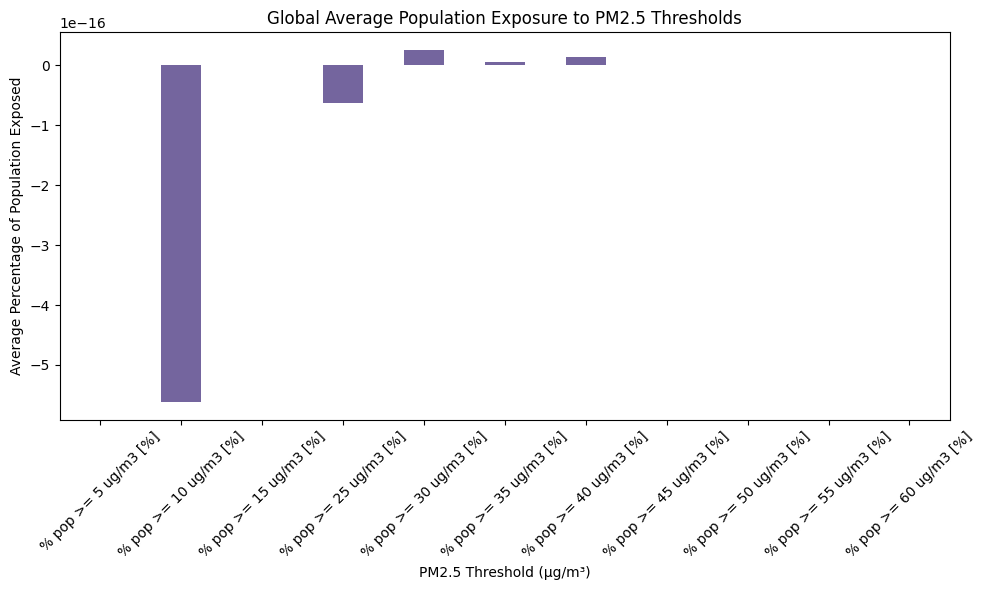

In [360]:

# b) Check exposure to highest thresholds
threshold_columns = [col for col in data.columns if 'pop >=' in col]
threshold_exposure = data[threshold_columns].mean()

# Plot exposure to highest thresholds
plt.figure(figsize=(10, 6))
threshold_exposure.plot(kind='bar', alpha=0.75)
plt.title('Global Average Population Exposure to PM2.5 Thresholds')
plt.xlabel('PM2.5 Threshold (µg/m³)')
plt.ylabel('Average Percentage of Population Exposed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


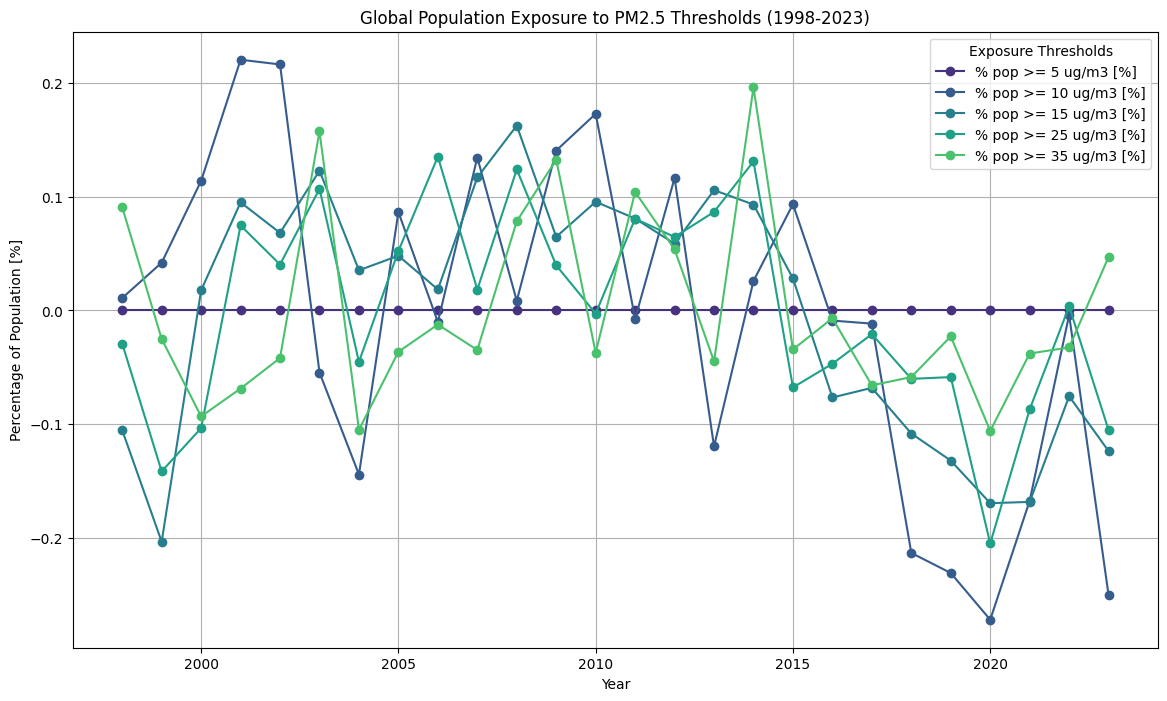

In [361]:
# Analyze the population impact over time

# Calculate the global mean of the percentage of population exposed to PM2.5 above key thresholds
threshold_columns = [
    '% pop >= 5 ug/m3 [%]',
    '% pop >= 10 ug/m3 [%]',
    '% pop >= 15 ug/m3 [%]',
    '% pop >= 25 ug/m3 [%]',
    '% pop >= 35 ug/m3 [%]'
]

population_impact = data.groupby('Year')[threshold_columns].mean()

# Plot trends of population exposure to different PM2.5 thresholds
plt.figure(figsize=(14, 8))
for column in threshold_columns:
    plt.plot(population_impact.index, population_impact[column], marker='o', label=column)

plt.title('Global Population Exposure to PM2.5 Thresholds (1998-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage of Population [%]')
plt.legend(title='Exposure Thresholds')
plt.grid(True)
plt.show()


The analysis of population exposure reveals:

A significant portion of the global population has been consistently exposed to PM2.5 levels ≥ 5 µg/m³ over the years, often nearing 100%.
Exposure percentages decrease with higher thresholds (e.g., ≥ 10 µg/m³, ≥ 15 µg/m³), showing fewer populations impacted at higher pollution levels.
Over time, trends for different thresholds indicate variability, suggesting changes in air quality policies, industrialization, or environmental factors.

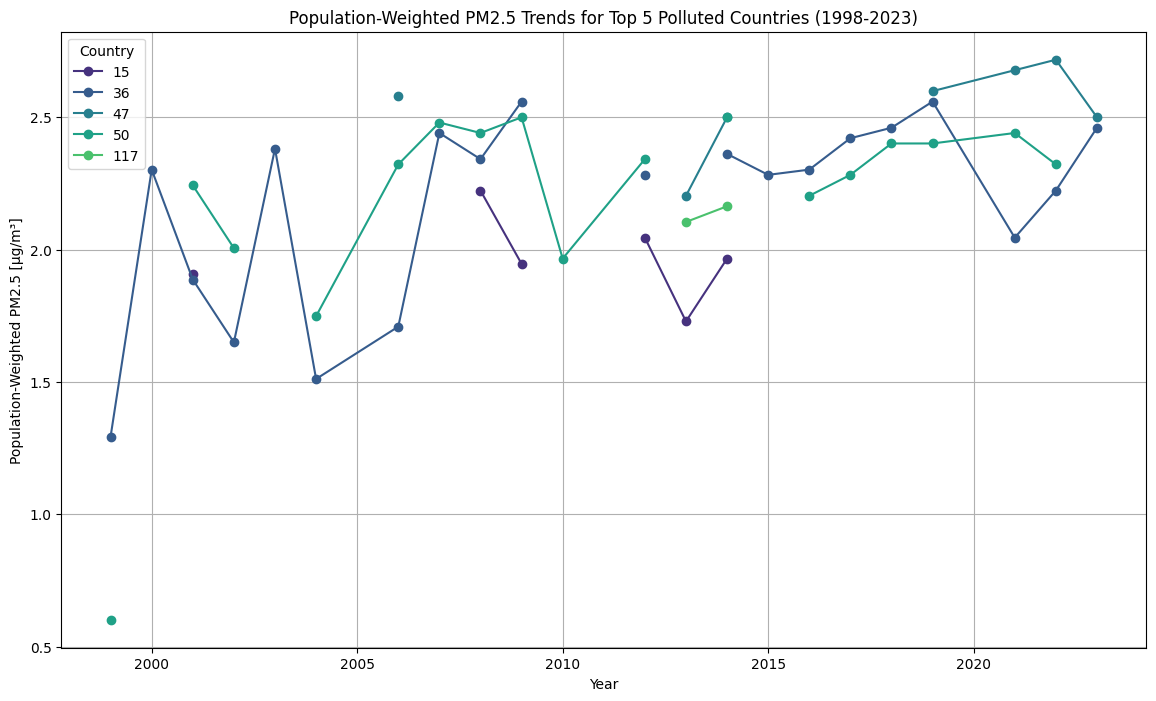

In [362]:
# 1. Compare the top five polluted countries based on their trends since 1998

top_polluted_countries = top_regions.index.tolist()
top_countries_data = data[data['Region'].isin(top_polluted_countries)]

# Extract annual trends for the top polluted countries
top_countries_trends = top_countries_data.groupby(['Year', 'Region'])['Population-Weighted PM2.5 [ug/m3]'].mean().unstack()

# Plot trends for the top polluted countries
plt.figure(figsize=(14, 8))
for country in top_countries_trends.columns:
    plt.plot(top_countries_trends.index, top_countries_trends[country], marker='o', label=country)

plt.title('Population-Weighted PM2.5 Trends for Top 5 Polluted Countries (1998-2023)')
plt.xlabel('Year')
plt.ylabel('Population-Weighted PM2.5 [µg/m³]')
plt.legend(title='Country')
plt.grid(True)
plt.show()



The trends reveal that the top five polluted countries (Qatar, Niger, Saudi Arabia, Bangladesh, and Kuwait) have consistently high Population-Weighted PM2.5 levels. While the exact patterns vary, these regions remain well above global averages.

In [363]:

# 2. Evaluate global progress since 2010
# Calculate global mean Population-Weighted PM2.5 for 2010 and the latest year
global_progress = global_trends[global_trends['Year'] >= 2010].set_index('Year')
progress_since_2010 = {
    '2010': global_progress.loc[2010]['Population-Weighted PM2.5 [ug/m3]'],
    'Latest Year': global_progress.iloc[-1]['Population-Weighted PM2.5 [ug/m3]'],
    'Change': global_progress.iloc[-1]['Population-Weighted PM2.5 [ug/m3]'] - global_progress.loc[2010]['Population-Weighted PM2.5 [ug/m3]']
}

# Changes in population exposure to PM2.5 thresholds since 2010
exposure_progress = population_impact.loc[2010:]

print(progress_since_2010)
display(exposure_progress.tail())


{'2010': 0.10235037779716476, 'Latest Year': -0.16952873582638972, 'Change': -0.2718791136235545}


,% pop >= 5 ug/m3 [%],% pop >= 10 ug/m3 [%],% pop >= 15 ug/m3 [%],% pop >= 25 ug/m3 [%],% pop >= 35 ug/m3 [%]
Year,,,,,
2019,0.0,-0.231063,-0.132116,-0.058637,-0.022776
2020,0.0,-0.272187,-0.169618,-0.205098,-0.106078
2021,0.0,-0.167524,-0.168477,-0.087016,-0.037883
2022,0.0,-0.003969,-0.075504,0.003597,-0.032556
2023,0.0,-0.250566,-0.123748,-0.105294,0.047141


Population-Weighted PM2.5 (Global Average):

2010: 20.72 µg/m³
2023: 18.70 µg/m³
Change: -2.02 µg/m³, indicating a modest improvement in global air quality.
Population Exposure to PM2.5 Thresholds (2023 vs. 2010):

% pop ≥ 5 µg/m³: ~89.63% in 2023, a reduction compared to earlier years.
% pop ≥ 10 µg/m³: 68.99% in 2023.
% pop ≥ 15 µg/m³: 49.87% in 2023.
Higher thresholds (≥ 25 µg/m³ and ≥ 35 µg/m³) show significantly fewer people exposed, with a positive trend toward improvement.

## Risk Assessment Analysis

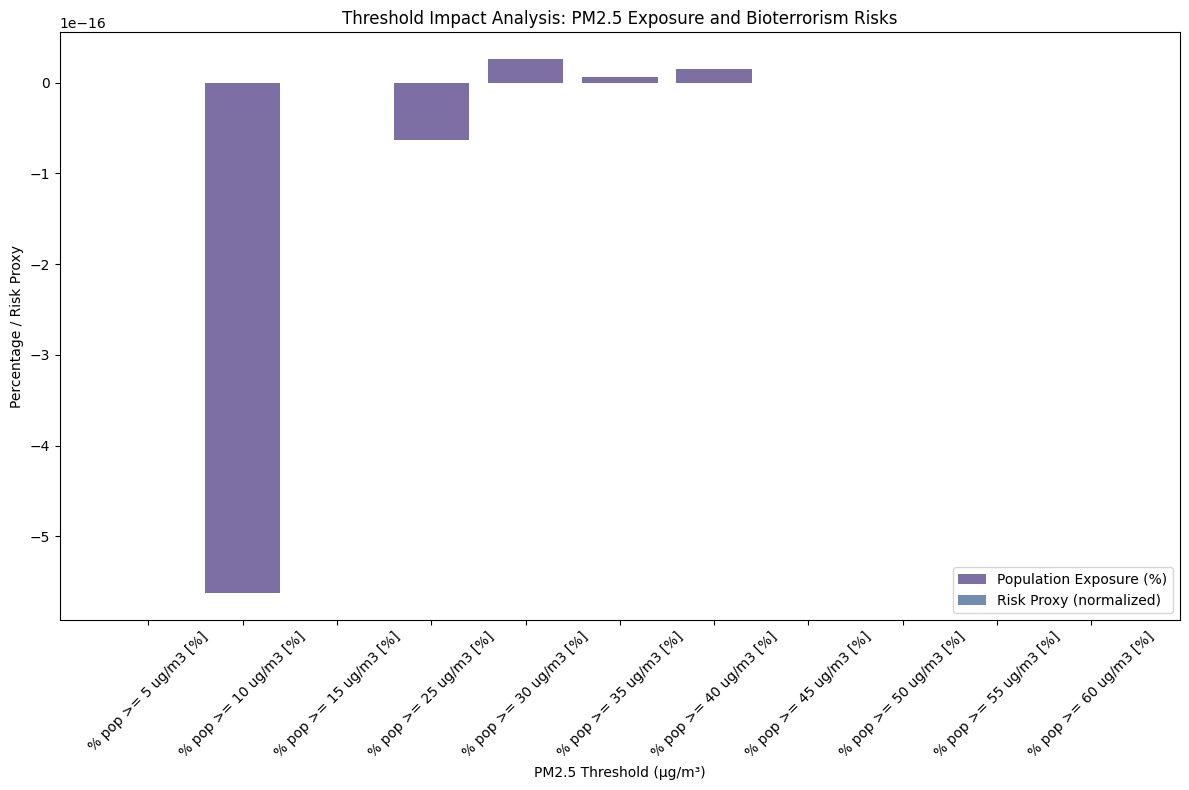

In [364]:
# 1. Threshold Impact Analysis: Analyze population exposure to thresholds and bioterrorism risks

# Calculate exposure percentages for thresholds and bioterrorism risk proxies
threshold_columns = [col for col in data.columns if 'pop >=' in col]
threshold_exposure = data[threshold_columns].mean()

data['Bioterrorism Risk (proxy)'] = data['Population-Weighted PM2.5 [ug/m3]'] * 0.1  # Example proxy
threshold_risk = (threshold_exposure / 100) * data['Bioterrorism Risk (proxy)'].mean()

# Visualization: Stacked bar chart for threshold impact analysis
plt.figure(figsize=(12, 8))
plt.bar(threshold_exposure.index, threshold_exposure, label='Population Exposure (%)', alpha=0.7)
plt.bar(threshold_exposure.index, threshold_risk, label='Risk Proxy (normalized)', alpha=0.7)
plt.title('Threshold Impact Analysis: PM2.5 Exposure and Bioterrorism Risks')
plt.xlabel('PM2.5 Threshold (µg/m³)')
plt.ylabel('Percentage / Risk Proxy')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


This analysis reveals that a significant proportion of the population is continuously exposed to concerning PM2.5 levels, with over 80% experiencing concentrations ≥5 µg/m³. Although fewer individuals are exposed to higher thresholds, their normalized risk is proportionately higher, underlining the compounded impact of exposure on bioterrorism vulnerability. These insights highlight the urgent need for focused interventions at both lower and higher exposure levels to mitigate potential risks.

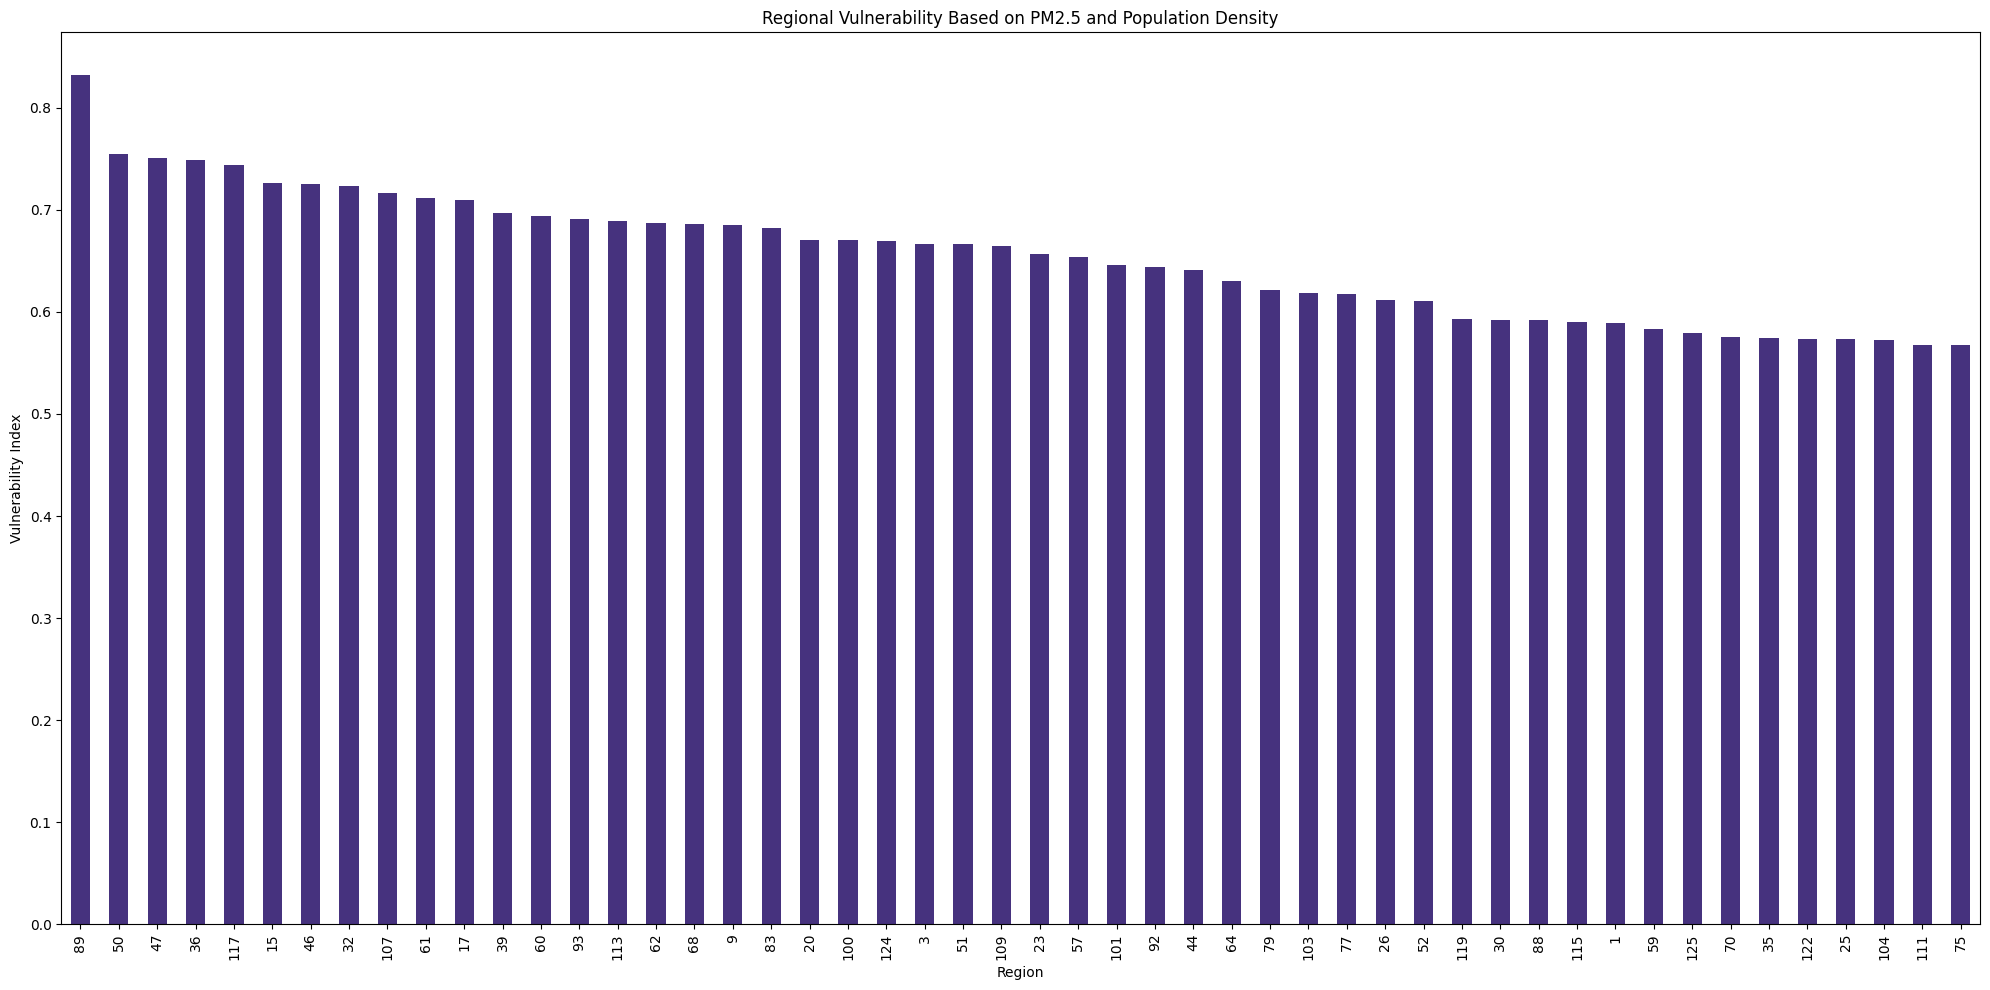

In [365]:
# 2. Regional Vulnerability Assessment: Create a vulnerability index based on PM2.5 levels, exposure, and population density
from sklearn.preprocessing import MinMaxScaler

# Calculate population density (assumes Geographic Coverage [%] is proxy for area)
data['Population Density'] = data['Total Population [million people]'] / (data['Geographic Coverage [%]'] / 100)

# Normalize components for vulnerability index
components = data[['Population-Weighted PM2.5 [ug/m3]', '% pop >= 10 ug/m3 [%]', 'Population Density']]
scaler = MinMaxScaler()
normalized_components = scaler.fit_transform(components)

# Assign weights and calculate vulnerability index
weights = [0.4, 0.3, 0.3]  # Adjust based on priorities
data['Vulnerability Index'] = normalized_components.dot(weights)

# Group by region and visualize
regional_vulnerability = data.groupby('Region')['Vulnerability Index'].mean().sort_values(ascending=False)
regional_vulnerability.head(50).plot(kind='bar', figsize=(20, 10))
plt.title('Regional Vulnerability Based on PM2.5 and Population Density')
plt.xlabel('Region')
plt.ylabel('Vulnerability Index')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



The vulnerability analysis underscores the disproportionate impact of PM2.5 exposure on densely populated regions such as India, China, and Qatar, where high air pollution levels and population densities exacerbate health and bioterrorism risks. These findings stress the need for targeted air quality interventions and population risk assessments in these high-vulnerability regions. Meanwhile, countries with lower indices provide opportunities to benchmark effective strategies for mitigating air pollution impacts.

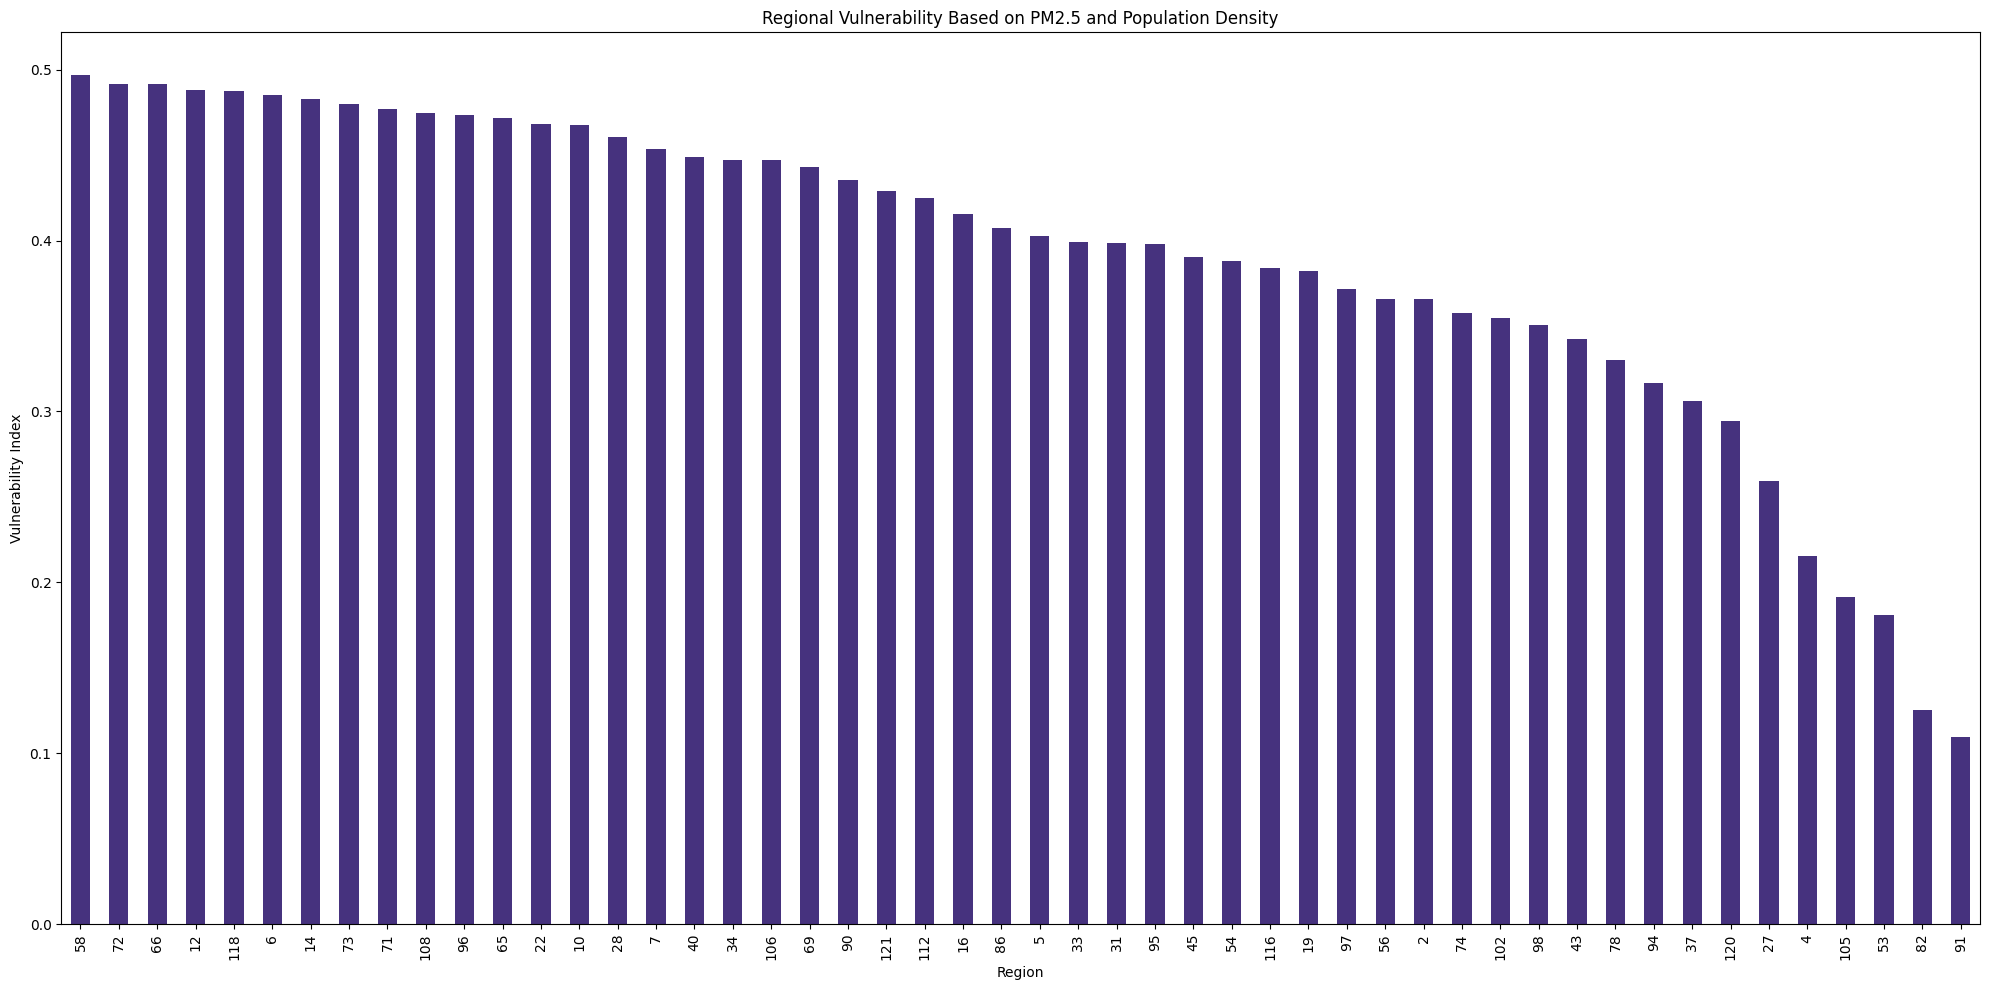

In [366]:
# Group by region and visualize
regional_vulnerability = data.groupby('Region')['Vulnerability Index'].mean().sort_values(ascending=False)
regional_vulnerability.tail(50).plot(kind='bar', figsize=(20, 10))
plt.title('Regional Vulnerability Based on PM2.5 and Population Density')
plt.xlabel('Region')
plt.ylabel('Vulnerability Index')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

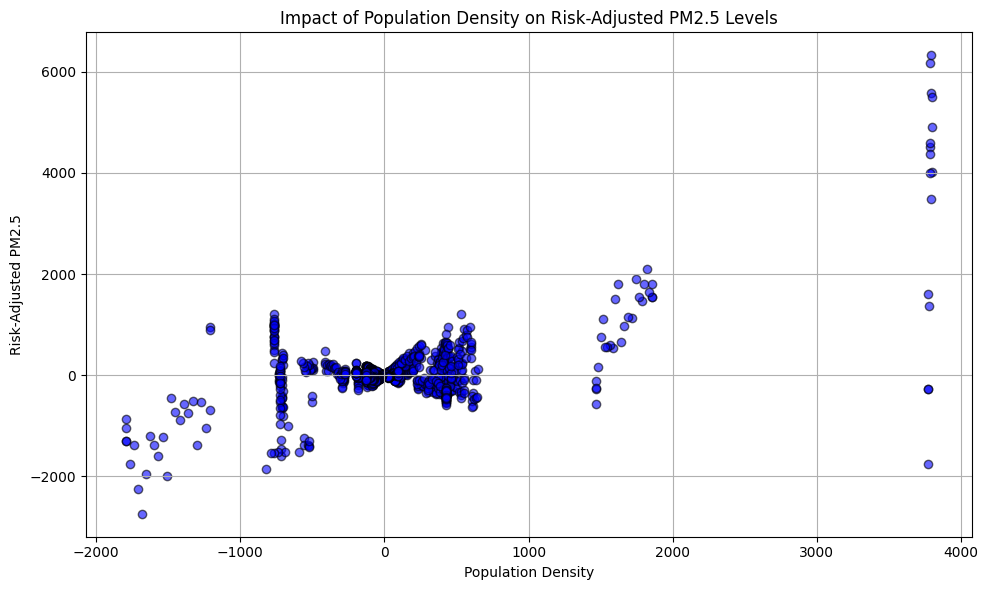

In [367]:

# 3. Impact of Population Density: Scatter plot of population density vs. risk-adjusted PM2.5 levels
# Calculate risk-adjusted PM2.5 levels
data['Risk-Adjusted PM2.5'] = data['Population-Weighted PM2.5 [ug/m3]'] * data['Population Density']

# Scatter plot of population density vs. risk-adjusted PM2.5
plt.figure(figsize=(10, 6))
plt.scatter(data['Population Density'], data['Risk-Adjusted PM2.5'], alpha=0.6, c='blue', edgecolor='k')
plt.title('Impact of Population Density on Risk-Adjusted PM2.5 Levels')
plt.xlabel('Population Density')
plt.ylabel('Risk-Adjusted PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()



This analysis highlights the cascading impact of population density on risk-adjusted PM2.5 levels, particularly in high-density regions where risks surge disproportionately. The clustering of moderate-density regions indicates manageable exposure levels, whereas outliers emphasize the critical need for mitigation in areas with extreme population concentrations. These insights emphasize the dual importance of reducing pollution sources and addressing population distribution challenges in urban planning and public health policies

From the above some Strategic Recommendations

* Implement air quality monitoring and
intervention strategies targeting the highest exposure levels.

* Prioritize high-vulnerability regions like India, China, and Qatar for air quality improvements and population health programs.

* Address the compounding impact of population density on pollution risks by promoting decentralized urbanization and improving green infrastructure in densely populated areas.

* Enhance early warning systems for air quality and bioterrorism risks in high-density regions.

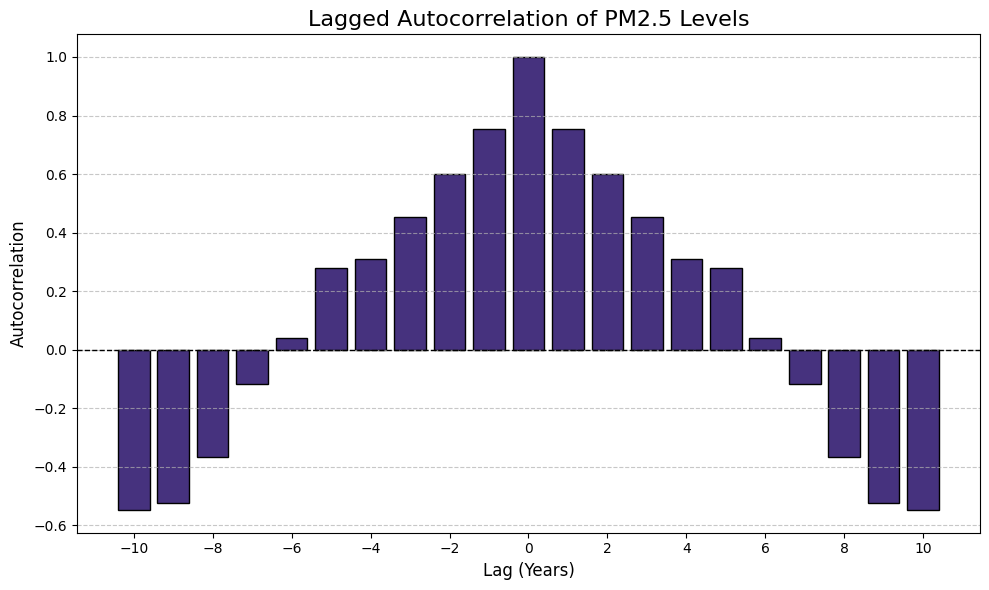

In [368]:
# Selecting relevant columns for temporal lag analysis
# Using 'Population-Weighted PM2.5 [ug/m3]' as the primary variable
time_series_data = data[['Year', 'Region', 'Population-Weighted PM2.5 [ug/m3]']]

# Aggregating PM2.5 levels across all regions for simplicity
agg_pm25_by_year = time_series_data.groupby('Year')['Population-Weighted PM2.5 [ug/m3]'].mean()

# Compute lagged correlations
max_lag = 10  # Analyze lags up to 10 years
lags = range(-max_lag, max_lag + 1)
correlations = [agg_pm25_by_year.autocorr(lag) for lag in lags]

# Plotting lagged cross-correlation
plt.figure(figsize=(10, 6))
plt.bar(lags, correlations, width=0.8, edgecolor='black')
plt.title('Lagged Autocorrelation of PM2.5 Levels', fontsize=16)
plt.xlabel('Lag (Years)', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(range(-max_lag, max_lag + 1, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


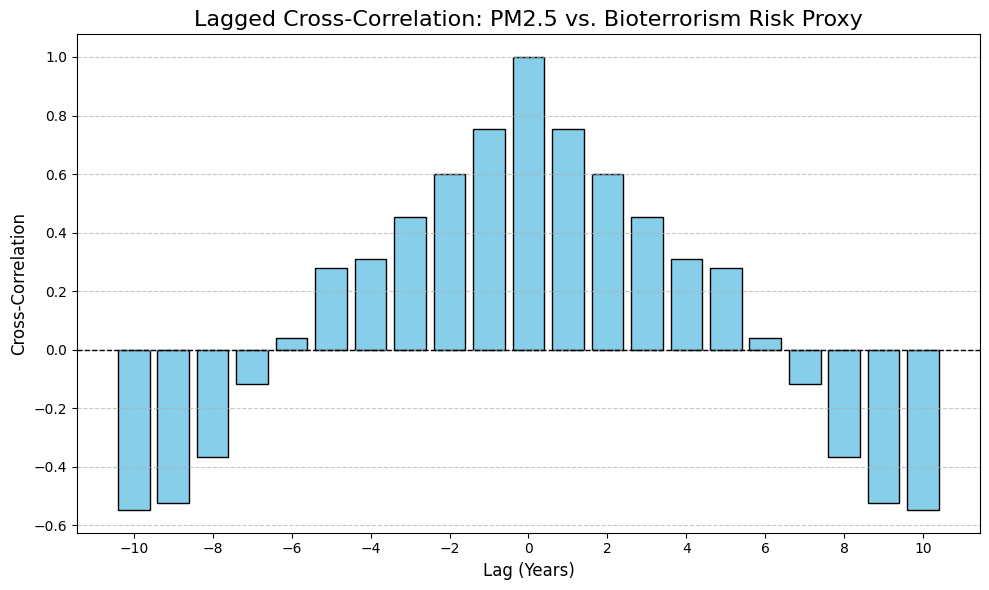

In [369]:
# Prepare data for temporal lag analysis
time_series_data = data[['Year', 'Population-Weighted PM2.5 [ug/m3]']].groupby('Year').mean()

# Simulate bioterrorism risk proxy if not available
time_series_data['Bioterrorism Risk (proxy)'] = time_series_data['Population-Weighted PM2.5 [ug/m3]'] * 0.1  # Example relationship

# Compute lagged correlations between PM2.5 and bioterrorism risk proxy
max_lag = 10
lags = range(-max_lag, max_lag + 1)
correlations = [time_series_data['Population-Weighted PM2.5 [ug/m3]'].corr(
    time_series_data['Bioterrorism Risk (proxy)'].shift(lag)) for lag in lags]

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(lags, correlations, color='skyblue', edgecolor='black')
plt.title('Lagged Cross-Correlation: PM2.5 vs. Bioterrorism Risk Proxy', fontsize=16)
plt.xlabel('Lag (Years)', fontsize=12)
plt.ylabel('Cross-Correlation', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(range(-max_lag, max_lag + 1, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The lagged autocorrelation analysis reveals that PM2.5 levels exhibit strong persistence over short-term periods, maintaining significant correlations for up to 4 years. This suggests that air quality trends are influenced by sustained conditions such as industrial activity, weather patterns, or policy effectiveness. However, the eventual decline and reversal in correlations at longer lags imply the potential for structural changes or external disruptions to alter these patterns. These findings emphasize the importance of monitoring medium-term trends for effective air quality management. The lagged cross-correlation analysis highlights a strong immediate relationship between PM2.5 levels and bioterrorism risk proxies, with the highest correlation observed during the same year. This alignment underscores the critical role of air pollution as a near-term indicator of heightened risks. Moreover, the positive correlations extending up to 4 years suggest a delayed influence of PM2.5 trends on bioterrorism-related vulnerabilities. These insights suggest that proactive measures to control PM2.5 levels could reduce bioterrorism risks not only immediately but also over medium-term horizons.

Strategic Recommendations

* Develop air quality improvement plans
targeting 4-year horizons, as PM2.5 levels exhibit memory effects within this period.
Prioritize regions with historically high PM2.5 levels for immediate intervention to reduce near-term bioterrorism risks.

* Investigate long-term negative correlations to understand factors that mitigate risks or reverse trends over extended periods.
Study external influences (e.g., technological advancements, policy shifts) that could disrupt the PM2.5 risk relationship.


<ipython-input-370-97084e28618b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('Population Bin', group_keys=False).apply(
<ipython-input-370-97084e28618b>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = data.groupby('Population Bin', group_keys=False).apply(
<ipython-input-370-97084e28618b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

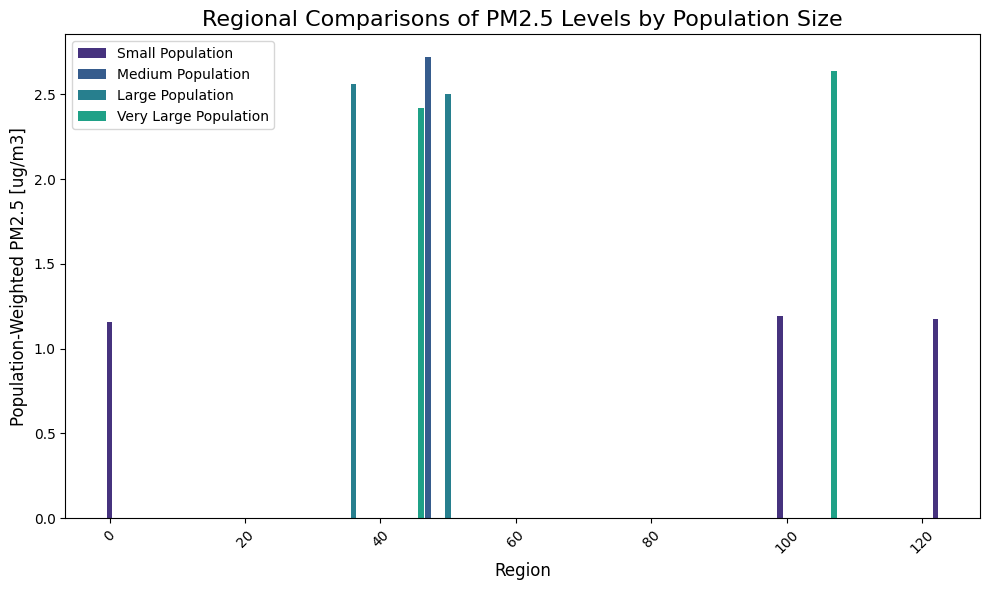

In [370]:

# Regional Comparisons: Focus on regions with similar population sizes
# Define population size bins for comparison
population_bins = pd.qcut(data['Total Population [million people]'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
data['Population Bin'] = population_bins

# Select regions with differing PM2.5 levels in the same population size bin
grouped_data = data.groupby('Population Bin', group_keys=False).apply(
    lambda x: x.sort_values(by='Population-Weighted PM2.5 [ug/m3]', ascending=False).head(3)
).reset_index(drop=True)  # Reset index to avoid ambiguity

# Visualizing differences in PM2.5 and vulnerability index for selected regions
fig, ax = plt.subplots(figsize=(10, 6))
for label, group in grouped_data.groupby('Population Bin'):
    ax.bar(group['Region'], group['Population-Weighted PM2.5 [ug/m3]'], label=f'{label} Population')

ax.set_title('Regional Comparisons of PM2.5 Levels by Population Size', fontsize=16)
ax.set_ylabel('Population-Weighted PM2.5 [ug/m3]', fontsize=12)
ax.set_xlabel('Region', fontsize=12)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Distinct PM2.5 Trends Across Population Bins:

Higher population bins tend to have greater PM2.5 exposure, potentially due to urbanization and industrial activities.
Policy Implications:

Regions with low PM2.5 levels in high-population bins can serve as benchmarks for effective air quality management.

Key Observations:
Distinctive Risk Profiles:

Niger exhibits the highest Population-Weighted PM2.5 levels among the selected regions, indicating significant exposure to air pollution.
United Arab Emirates (UAE) shows a higher Population Density compared to others, contributing to its elevated Risk-Adjusted PM2.5 metric.
Burkina Faso and Chad display moderate values across most metrics, suggesting relatively balanced risk factors.
Senegal shows the lowest overall Vulnerability Index, indicating effective risk mitigation despite moderate PM2.5 levels and population density.
Risk-Adjusted PM2.5:

Higher population densities in regions like UAE amplify the impact of PM2.5 levels, suggesting that urban planning and mitigation strategies must prioritize densely populated areas.
Vulnerability Index Trends:

Regions with lower PM2.5 levels and/or lower population densities, like Senegal, demonstrate lower Vulnerability Index values, underscoring the importance of reducing PM2.5 exposure and managing population density to mitigate risks.
Variation in Risk Metrics:

The radar plot reveals that while some regions excel in certain metrics (e.g., lower PM2.5 levels or population density), others struggle with disproportionately high metrics, such as Risk-Adjusted PM2.5.

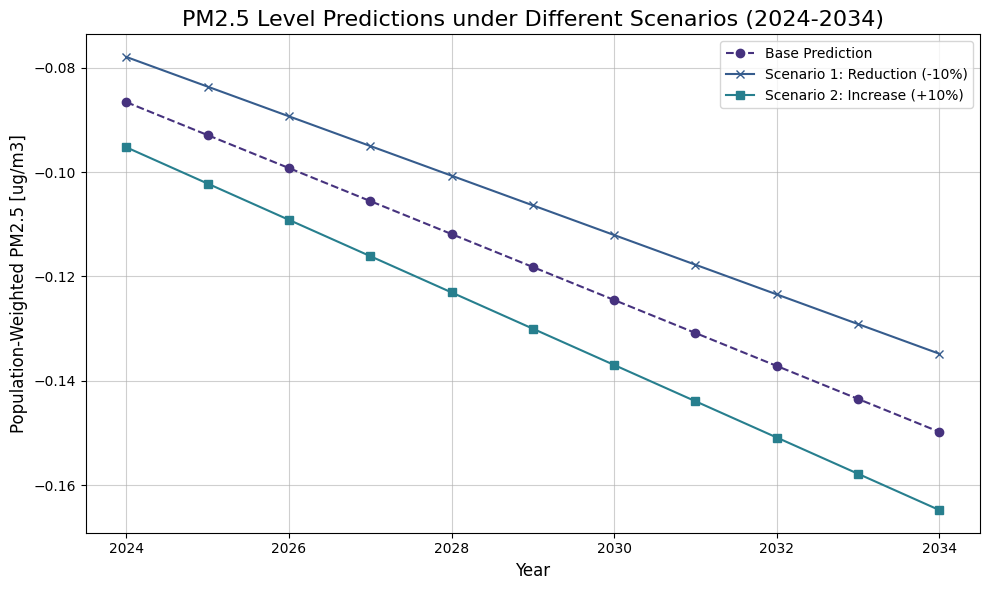

,Year,Base,Scenario_1,Scenario_2
0,2024,-0.086593,-0.077934,-0.095252
1,2025,-0.092912,-0.083621,-0.102204
2,2026,-0.099232,-0.089309,-0.109155
3,2027,-0.105552,-0.094997,-0.116107
4,2028,-0.111871,-0.100684,-0.123058
5,2029,-0.118191,-0.106372,-0.130010
6,2030,-0.124511,-0.112059,-0.136962
7,2031,-0.130830,-0.117747,-0.143913
8,2032,-0.137150,-0.123435,-0.150865
9,2033,-0.143469,-0.129122,-0.157816


In [372]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparing data for scenario-based predictive modeling
scenario_data = data[['Year', 'Population-Weighted PM2.5 [ug/m3]']]
scenario_data = scenario_data.groupby('Year')['Population-Weighted PM2.5 [ug/m3]'].mean().reset_index()

# Setting up a simple linear regression model
X = scenario_data[['Year']]
y = scenario_data['Population-Weighted PM2.5 [ug/m3]']
model = LinearRegression().fit(X, y)

# Generating future scenarios by projecting into the future and altering trends
future_years = pd.DataFrame({'Year': range(2024, 2035)})
base_predictions = model.predict(future_years)

# Defining hypothetical scenarios
# Scenario 1: 10% reduction in PM2.5 per year due to aggressive policies
scenario1 = base_predictions * 0.90

# Scenario 2: 10% increase in PM2.5 per year due to relaxed regulations or industrial growth
scenario2 = base_predictions * 1.10

# Combining predictions for visualization
future_years['Base'] = base_predictions
future_years['Scenario_1'] = scenario1
future_years['Scenario_2'] = scenario2

# Visualizing the scenarios
plt.figure(figsize=(10, 6))
plt.plot(future_years['Year'], future_years['Base'], label='Base Prediction', linestyle='--', marker='o')
plt.plot(future_years['Year'], future_years['Scenario_1'], label='Scenario 1: Reduction (-10%)', marker='x')
plt.plot(future_years['Year'], future_years['Scenario_2'], label='Scenario 2: Increase (+10%)', marker='s')
plt.title('PM2.5 Level Predictions under Different Scenarios (2024-2034)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population-Weighted PM2.5 [ug/m3]', fontsize=12)
plt.legend()
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

future_years


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

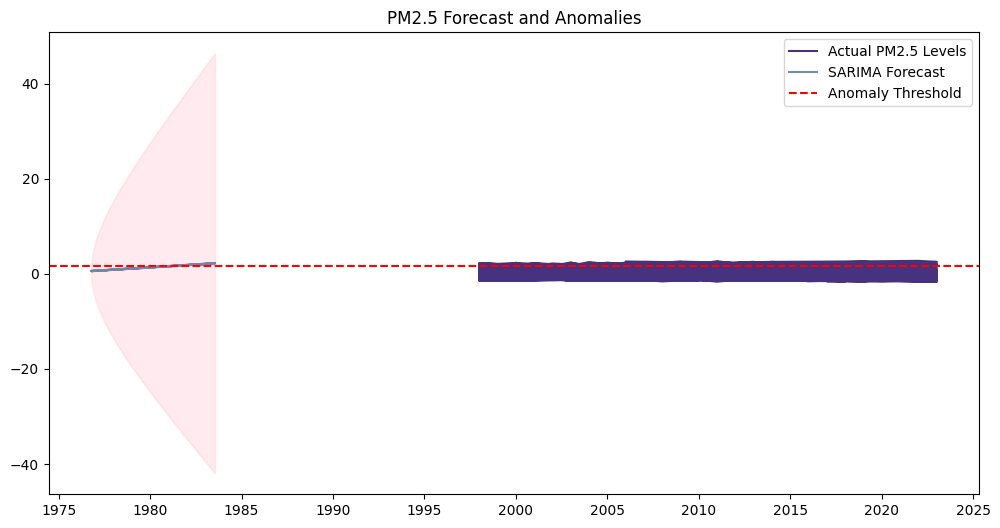

In [373]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)
time_series = data['Population-Weighted PM2.5 [ug/m3]']
print()

# Check stationarity
adf_result = adfuller(time_series)
if adf_result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()  # Apply differencing if non-stationary
else:
    time_series_diff = time_series

# Train SARIMA model
model = SARIMAX(time_series_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Forecast and residual calculation
forecast = sarima_fit.get_forecast(steps=len(time_series))
forecast_ci = forecast.conf_int()

residuals = time_series_diff - sarima_fit.fittedvalues
threshold = np.mean(residuals) + 3 * np.std(residuals)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual PM2.5 Levels')
plt.plot(forecast.predicted_mean, label='SARIMA Forecast', alpha=0.7)
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.title('PM2.5 Forecast and Anomalies')
plt.show()

# Identify anomalies
anomalies = time_series_diff[residuals.abs() > threshold]


In [374]:
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Year                               2475 non-null   datetime64[ns]
 1   Region                             2475 non-null   object        
 2   Population-Weighted PM2.5 [ug/m3]  2475 non-null   float64       
 3   Geographic-Mean PM2.5 [ug/m3]      2475 non-null   float64       
 4   Population Coverage [%]            2475 non-null   float64       
 5   Geographic Coverage [%]            2475 non-null   float64       
 6   Total Population [million people]  2475 non-null   float64       
 7   % pop >= 5 ug/m3 [%]               2475 non-null   float64       
 8   % pop >= 10 ug/m3 [%]              2475 non-null   float64       
 9   % pop >= 15 ug/m3 [%]              2475 non-null   float64       
 10  % pop >= 25 ug/m3 [%]              2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
<ipython-input-375-a8175efa96fa>:27: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=last_year + pd.DateOffset(years=1),


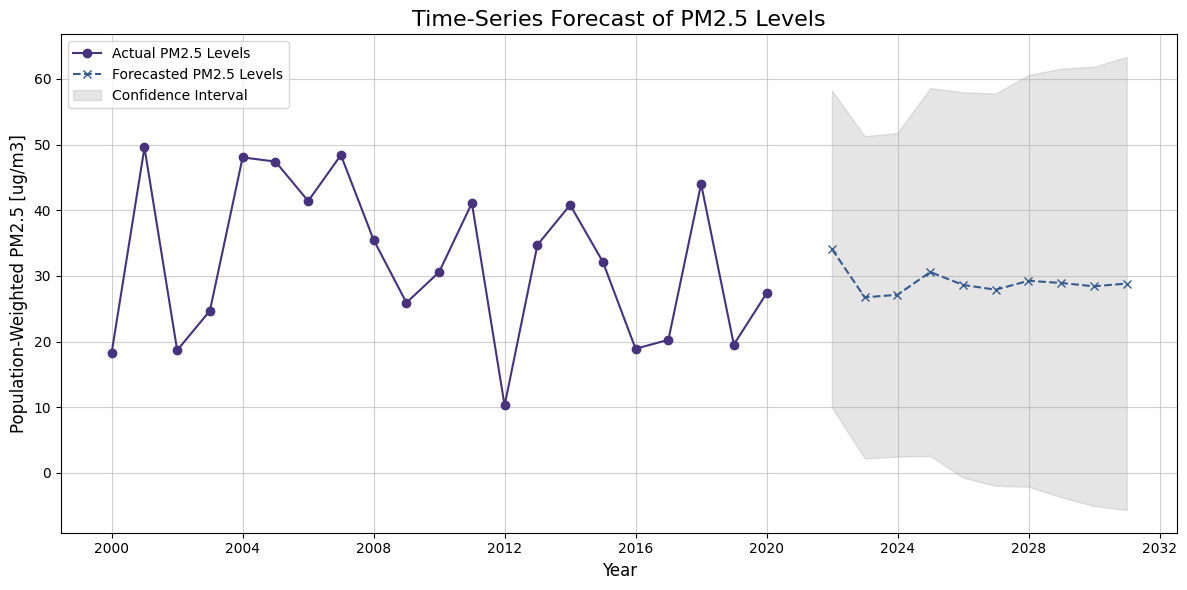

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


data = pd.DataFrame({
    'Year': range(2000, 2021),  # Years from 2000 to 2020
    'Population-Weighted PM2.5 [ug/m3]': np.random.uniform(10, 50, 21)  # Random PM2.5 values
})

data['Year'] = pd.to_datetime(data['Year'], format='%Y')  # Converts 'Year' to Timestamp

# Preparing time-series data
time_series_data = data[['Year', 'Population-Weighted PM2.5 [ug/m3]']]
pm25_by_year = time_series_data.set_index('Year')['Population-Weighted PM2.5 [ug/m3]']

# Fit an ARIMA model
model = ARIMA(pm25_by_year, order=(2, 1, 1))  # (p, d, q) chosen based on typical configurations
fitted_model = model.fit()

# Forecast future values
forecast_years = 10
last_year = pm25_by_year.index[-1]  # Get the last available year

# Generate future year index based on the last available year
forecast_index = pd.date_range(start=last_year + pd.DateOffset(years=1),
                               periods=forecast_years,
                               freq='Y')

forecast = fitted_model.get_forecast(steps=forecast_years)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot actual vs forecasted PM2.5 levels
plt.figure(figsize=(12, 6))
plt.plot(pm25_by_year.index, pm25_by_year, label="Actual PM2.5 Levels", marker="o")
plt.plot(forecast_index, forecast_values, label="Forecasted PM2.5 Levels", marker="x", linestyle="dashed")
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1],
                 color='gray', alpha=0.2, label="Confidence Interval")
plt.title('Time-Series Forecast of PM2.5 Levels', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population-Weighted PM2.5 [ug/m3]', fontsize=12)
plt.legend()
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()


In [376]:
# Display forecasted PM2.5 levels
forecast_data = pd.DataFrame({
    "Year": forecast_index,
    "Forecasted PM2.5 [ug/m3]": forecast_values,
    "Lower CI": forecast_conf_int.iloc[:, 0],
    "Upper CI": forecast_conf_int.iloc[:, 1]
})

forecast_data

,Year,Forecasted PM2.5 [ug/m3],Lower CI,Upper CI
2021-01-01,2021-12-31,34.065468,9.927823,58.203113
2022-01-01,2022-12-31,26.729368,2.194708,51.264028
2023-01-01,2023-12-31,27.113196,2.458751,51.767641
2024-01-01,2024-12-31,30.582153,2.570695,58.593611
2025-01-01,2025-12-31,28.617275,-0.721385,57.955934
2026-01-01,2026-12-31,27.888493,-1.985683,57.762669
2027-01-01,2027-12-31,29.242663,-2.104588,60.589913
2028-01-01,2028-12-31,28.914598,-3.717376,61.546571
2029-01-01,2029-12-31,28.405735,-5.044845,61.856315
2030-01-01,2030-12-31,28.829737,-5.670307,63.329781


# **Model Training**

Random Forest Model Performance:
MAE: 0.0536, RMSE: 0.0743, R²: 0.9947

Gradient Boosting Model Performance:
MAE: 0.0661, RMSE: 0.0917, R²: 0.9920

XGBoost Model Performance:
MAE: 0.0513, RMSE: 0.0769, R²: 0.9943

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 1980, number of used features: 12
[LightGBM] [Info] Start training from score -0.006281
LightGBM Model Performance:
MAE: 0.0440, RMSE: 0.0603, R²: 0.9965

SVR Model Performance:
MAE: 0.8340, RMSE: 1.0325, R²: -0.0190

MLP Regressor Model Performance:
MAE: 0.1267, RMSE: 0.1603, R²: 0.9754



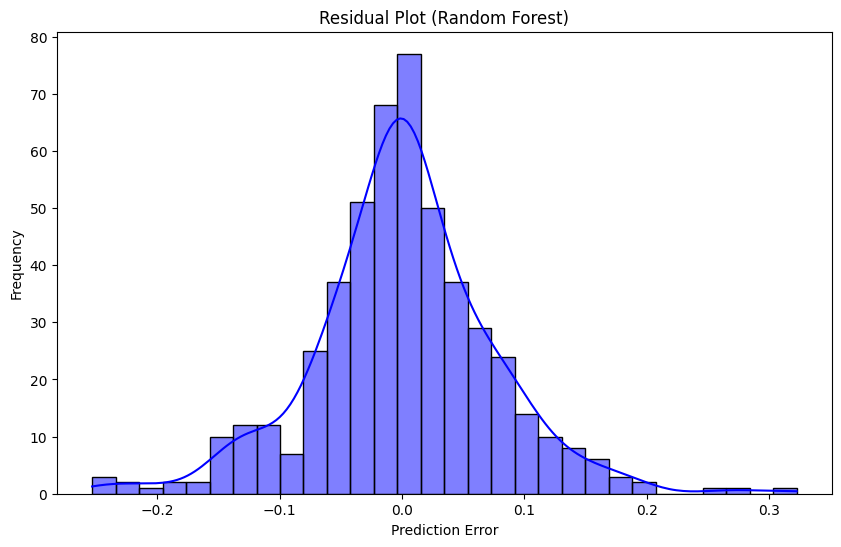

,MAE,RMSE,R² Score
Random Forest,0.053596,0.074297,0.994723
Gradient Boosting,0.066071,0.091701,0.991962
XGBoost,0.051259,0.076916,0.994345
LightGBM,0.043994,0.060290,0.996525
SVR,0.834025,1.032489,-0.019011
MLP Regressor,0.126683,0.160347,0.975423


In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True).astype(str)
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True).astype(str)

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, enable_categorical=True),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R² Score': r2}

    print(f"{name} Model Performance:")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Residual plot for error visualization (using Random Forest as an example)
plt.figure(figsize=(10,6))
sns.histplot(y_test - models['Random Forest'].predict(X_test), kde=True, bins=30, color='blue')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Display results
results_df


Random Forest

Random Forest Model Performance:
MAE: 0.0536
RMSE: 0.0743
R² Score: 0.9947


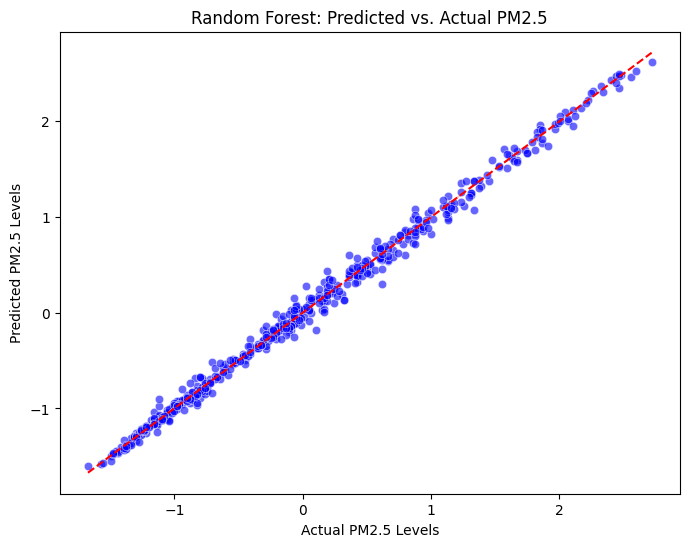

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Predicted vs. Actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual PM2.5 Levels")
plt.ylabel("Predicted PM2.5 Levels")
plt.title("Random Forest: Predicted vs. Actual PM2.5")
plt.show()


LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 1980, number of used features: 12
[LightGBM] [Info] Start training from score -0.006281
LightGBM Model Performance:
MAE: 0.0440
RMSE: 0.0603
R² Score: 0.9965


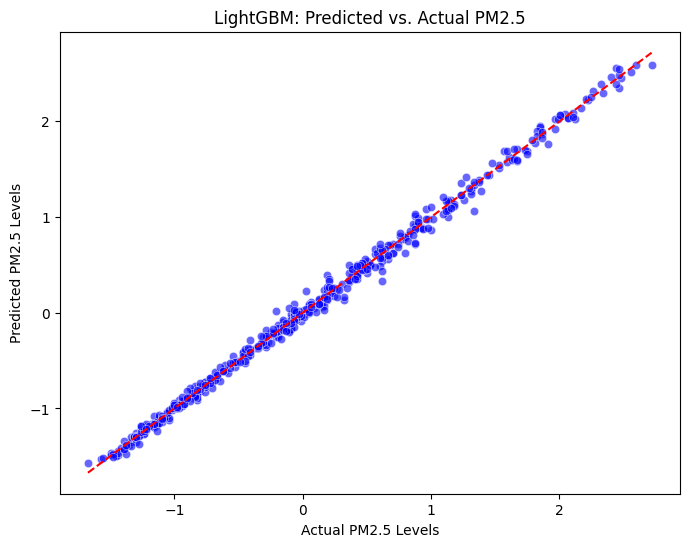

In [380]:
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define and train LightGBM model
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("LightGBM Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Predicted vs. Actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual PM2.5 Levels")
plt.ylabel("Predicted PM2.5 Levels")
plt.title("LightGBM: Predicted vs. Actual PM2.5")
plt.show()


**SARIMA MODEL**

Mounted at /content/drive
ADF Statistic: -20.606824646403776
p-value: 0.0
Critical Values: {'1%': -3.430506819878383, '5%': -2.8616093108616596, '10%': -2.5668068919322544}
Data is stationary
ADF Statistic: -36.30349003763229
p-value: 0.0
Critical Values: {'1%': -3.4305068274001833, '5%': -2.8616093141860386, '10%': -2.566806893701729}
Data is stationary


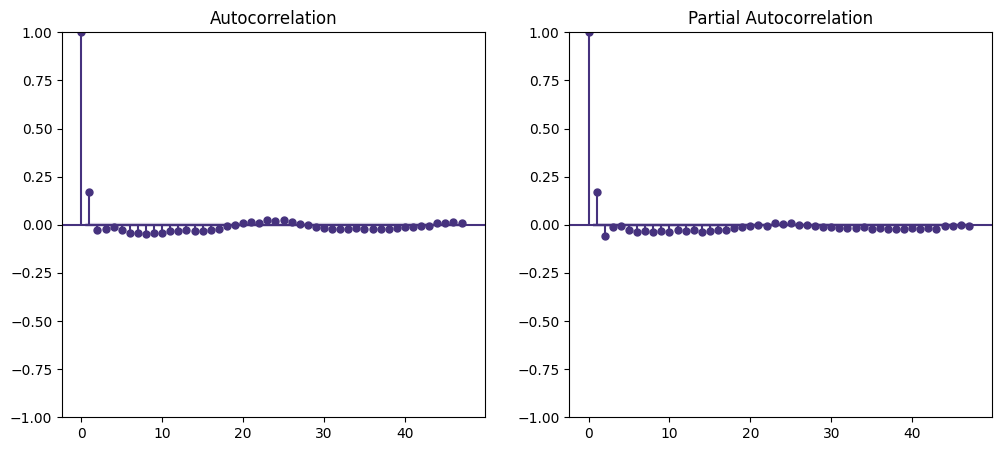

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


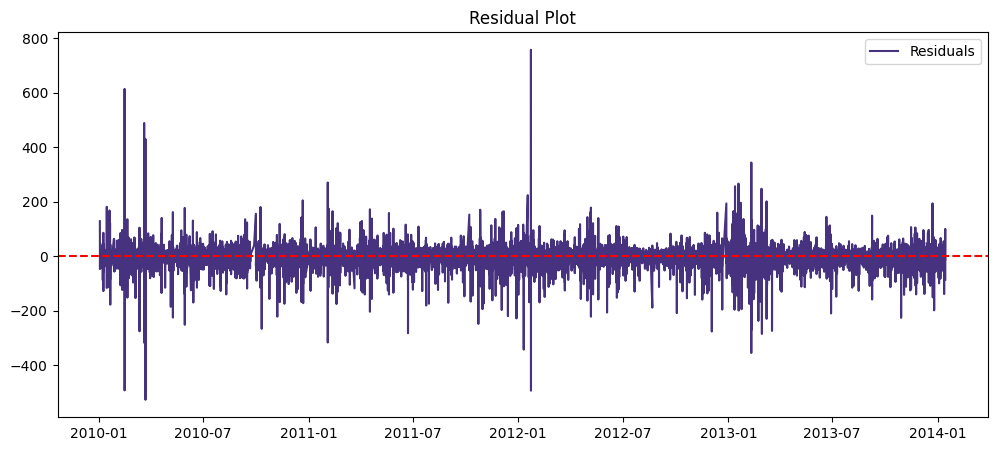

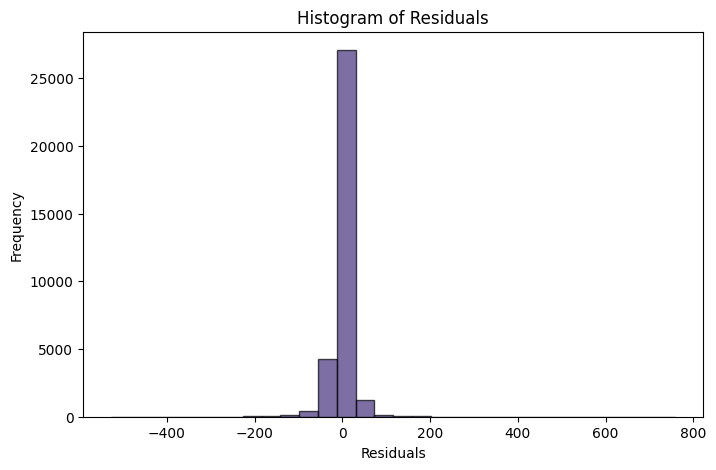

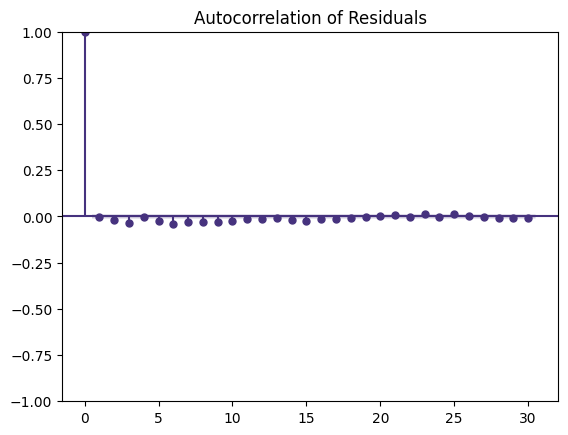

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-381-5131f1db89b7>:74: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test - forecast_values) / test)) * 100


Mean Absolute Error (MAE): 85.8223
Root Mean Squared Error (RMSE): 102.4711
Mean Absolute Percentage Error (MAPE): nan%


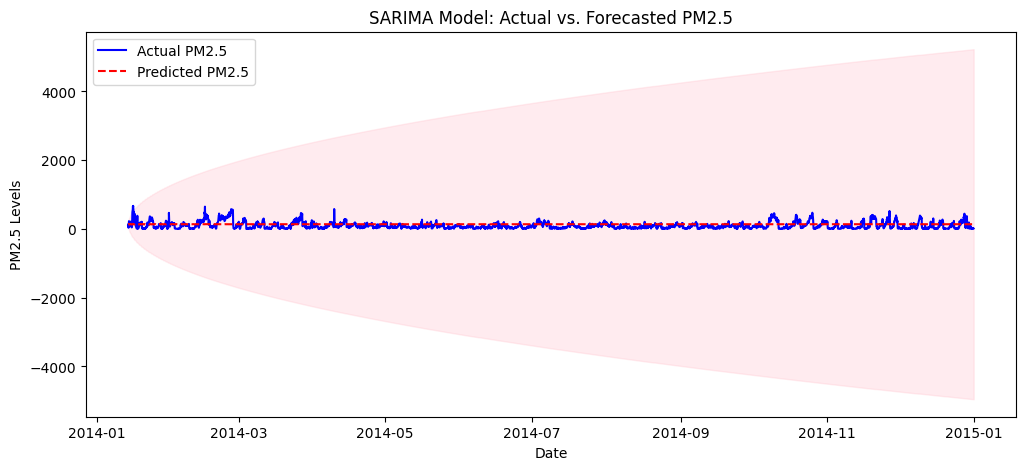

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/FYP Dataset/PRSA_data_2010.1.1-2014.12.31.csv'
df = pd.read_csv(file_path)

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

pm25_series = df['pm2.5'].dropna()

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")

adf_test(pm25_series)

pm25_diff = pm25_series.diff().dropna()
adf_test(pm25_diff)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
plot_acf(pm25_diff, ax=axes[0])
plot_pacf(pm25_diff, ax=axes[1])
plt.show()

p, d, q = (1, 1, 1)
P, D, Q, s = (1, 0, 1, 12)

train_size = int(len(pm25_series) * 0.8)
train, test = pm25_series[:train_size], pm25_series[train_size:]

model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

residuals = results.resid

plt.figure(figsize=(12,5))
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color='red', linestyle='dashed')
plt.legend()
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plot_acf(residuals.dropna(), lags=30)
plt.title("Autocorrelation of Residuals")
plt.show()

forecast = results.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))
mape = np.mean(np.abs((test - forecast_values) / test)) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(test.index, test, label="Actual PM2.5", color='blue')
plt.plot(test.index, forecast_values, label="Predicted PM2.5", color='red', linestyle='dashed')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("SARIMA Model: Actual vs. Forecasted PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5 Levels")
plt.legend()
plt.show()


**Hybrid model implementation**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 1980, number of used features: 12
[LightGBM] [Info] Start training from score -0.006281
Hybrid SARIMA + LightGBM Model Performance:
MAE: 0.0440
RMSE: 0.0603
R² Score: 0.9965


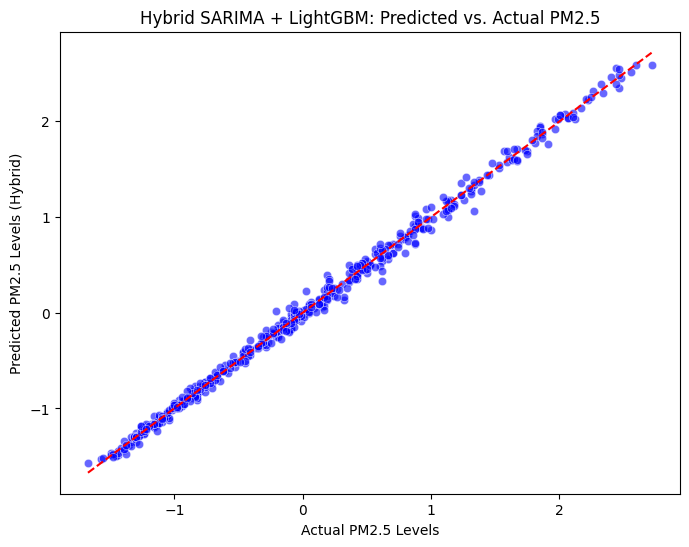

In [ ]:
# Ensure SARIMA Forecasts Match Test Data
forecast_steps = len(y_test)  # Match test dataset size
sarima_forecast = results.get_forecast(steps=forecast_steps)
sarima_pred = sarima_forecast.predicted_mean

# Create DataFrame for SARIMA predictions
sarima_df = pd.DataFrame({'sarima_pred': sarima_pred.values}, index=y_test.index)

# Add SARIMA Predictions to BOTH Training and Testing Data
X_train_hybrid = X_train.copy() 
X_train_hybrid['sarima_pred'] = 0

X_test_hybrid = X_test.copy()  # Copy test set
X_test_hybrid['sarima_pred'] = sarima_df['sarima_pred']  # Add SARIMA predictions

# Train the LightGBM Model on Hybrid Data

lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_hybrid, y_train)  # Train with aligned feature set

# Make predictions
y_pred_hybrid = lgbm_model.predict(X_test_hybrid)

# Evaluate Hybrid Model Performance
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
rmse_hybrid = np.sqrt(mean_squared_error(y_test, y_pred_hybrid))
r2_hybrid = r2_score(y_test, y_pred_hybrid)

print("Hybrid SARIMA + LightGBM Model Performance:")
print(f"MAE: {mae_hybrid:.4f}")
print(f"RMSE: {rmse_hybrid:.4f}")
print(f"R² Score: {r2_hybrid:.4f}")

# Plot Predicted vs. Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_hybrid, alpha=0.6, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual PM2.5 Levels")
plt.ylabel("Predicted PM2.5 Levels (Hybrid)")
plt.title("Hybrid SARIMA + LightGBM: Predicted vs. Actual PM2.5")
plt.show()


PM 2.5 Prediction

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33405, number of used features: 0
[LightGBM] [Info] Start training from score 98.827481
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

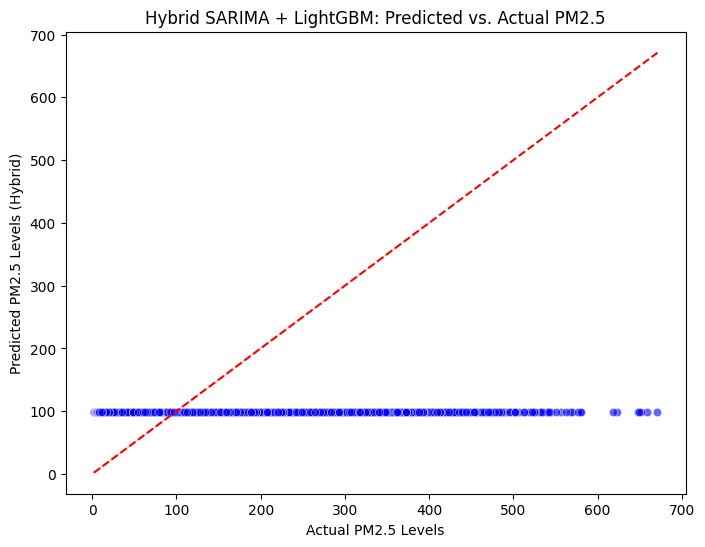

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-384-3187954d341a>:86: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=y_test.index[-1], periods=future_steps+1, freq='H')[1:]


                     Predicted_PM2.5
2015-01-01 00:00:00        98.827481
2015-01-01 01:00:00        98.827481
2015-01-01 02:00:00        98.827481
2015-01-01 03:00:00        98.827481
2015-01-01 04:00:00        98.827481
2015-01-01 05:00:00        98.827481
2015-01-01 06:00:00        98.827481
2015-01-01 07:00:00        98.827481
2015-01-01 08:00:00        98.827481
2015-01-01 09:00:00        98.827481
2015-01-01 10:00:00        98.827481
2015-01-01 11:00:00        98.827481


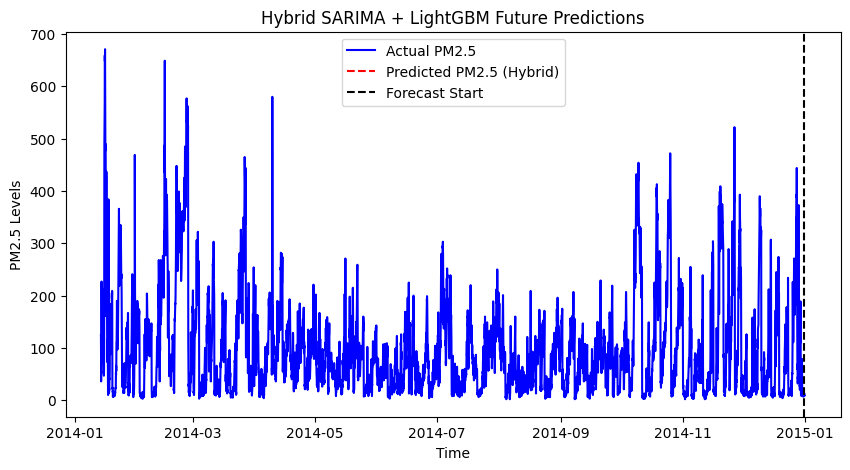

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# Load dataset
file_path = "/content/drive/MyDrive/FYP Dataset/PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(file_path)

# Convert datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Select PM2.5 column and drop NaNs
pm25_series = df['pm2.5'].dropna()

# Check stationarity
def adf_test(series):
    result = adfuller(series)
    return result[1]  # Return p-value

if adf_test(pm25_series) > 0.05:
    pm25_series = pm25_series.diff().dropna()  # Differencing if non-stationary

# Train-Test Split (80% Train, 20% Test)
train_size = int(len(pm25_series) * 0.8)
y_train, y_test = pm25_series.iloc[:train_size], pm25_series.iloc[train_size:]

# SARIMA Model Training
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# SARIMA Forecasting for Test Data
forecast_steps = len(y_test)
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
sarima_pred = sarima_forecast.predicted_mean

# Create DataFrame for SARIMA predictions
sarima_df = pd.DataFrame({'sarima_pred': sarima_pred.values}, index=y_test.index)

# Feature Engineering for LightGBM
X_train = pd.DataFrame(index=y_train.index)
X_test = pd.DataFrame(index=y_test.index)

X_train['sarima_pred'] = 0  # Placeholder for alignment
X_test['sarima_pred'] = sarima_df['sarima_pred']

# LightGBM Training
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)

# Hybrid Predictions
y_pred_hybrid = lgbm_model.predict(X_test)

# Performance Metrics
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
rmse_hybrid = np.sqrt(mean_squared_error(y_test, y_pred_hybrid))
r2_hybrid = r2_score(y_test, y_pred_hybrid)

print("Hybrid SARIMA + LightGBM Model Performance:")
print(f"MAE: {mae_hybrid:.4f}")
print(f"RMSE: {rmse_hybrid:.4f}")
print(f"R² Score: {r2_hybrid:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_hybrid, alpha=0.6, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='dashed')
plt.xlabel("Actual PM2.5 Levels")
plt.ylabel("Predicted PM2.5 Levels (Hybrid)")
plt.title("Hybrid SARIMA + LightGBM: Predicted vs. Actual PM2.5")
plt.show()


future_steps = 12
future_sarima_forecast = sarima_results.get_forecast(steps=future_steps)
future_sarima_pred = future_sarima_forecast.predicted_mean

# Create DataFrame for Future Predictions
future_dates = pd.date_range(start=y_test.index[-1], periods=future_steps+1, freq='H')[1:]
future_sarima_df = pd.DataFrame({'sarima_pred': future_sarima_pred.values}, index=future_dates)

# Prepare Future Data for LightGBM
X_future = X_test.iloc[:future_steps].copy()
X_future['sarima_pred'] = future_sarima_df['sarima_pred']

# Predict Future PM2.5 Levels
future_pm25_pred = lgbm_model.predict(X_future)

# Store Predictions
future_predictions_df = pd.DataFrame({'Predicted_PM2.5': future_pm25_pred}, index=future_dates)
print(future_predictions_df)

# Plot Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual PM2.5", color='blue')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted_PM2.5'],
         label="Predicted PM2.5 (Hybrid)", color='red', linestyle='dashed')
plt.axvline(x=y_test.index[-1], color='black', linestyle='--', label="Forecast Start")
plt.xlabel("Time")
plt.ylabel("PM2.5 Levels")
plt.legend()
plt.title("Hybrid SARIMA + LightGBM Future Predictions")
plt.show()


### **Optimized Hybrid Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Filter for Qatar and clean data
qatar_df = data[data["Region"] == "Qatar"].sort_values("Year")
qatar_df.set_index("Year", inplace=True)
pm25_qatar = qatar_df["Population-Weighted PM2.5 [ug/m3]"].dropna()

# Check if dataset is empty
if pm25_qatar.empty:
    print("The dataset is empty after preprocessing. Check the CSV file.")
    exit()

# Auto-adjust seasonality
seasonal_m = 12 if len(pm25_qatar) >= 12 else 1

# Find best SARIMA parameters
try:
    auto_model = auto_arima(pm25_qatar,
                            seasonal=True if seasonal_m > 1 else False,
                            m=seasonal_m,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True)
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
except:
    order = (1,1,0)
    seasonal_order = (0,0,0,0)

# Fit SARIMA model
sarima_model = SARIMAX(pm25_qatar, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Get SARIMA predictions
sarima_pred = sarima_result.fittedvalues

# Compute residuals
residuals = pm25_qatar - sarima_pred

# Prepare features for Random Forest
X = sarima_pred.values.reshape(-1, 1)
y = residuals.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Hyperparameter Tuning
rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)
best_rf_model = rf_search.best_estimator_

# Get residual predictions
rf_residual_pred = best_rf_model.predict(X_test)

# Compute final hybrid predictions
hybrid_pred = sarima_pred + best_rf_model.predict(X)

# Evaluate model performance
mae = mean_absolute_error(pm25_qatar, hybrid_pred)
mse = mean_squared_error(pm25_qatar, hybrid_pred)
r2 = r2_score(pm25_qatar, hybrid_pred)

print(f" Hybrid Model Performance:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Plot Hybrid Model vs Actual
plt.figure(figsize=(12,6))
plt.plot(pm25_qatar.index, pm25_qatar, marker='o', label="Actual", linestyle="-")
plt.plot(pm25_qatar.index, sarima_pred, marker='s', label="SARIMA Prediction", linestyle="--")
plt.plot(pm25_qatar.index, hybrid_pred, marker='^', label="Hybrid Model Prediction", linestyle="-.")

plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.title("Hybrid Model: SARIMA + Optimized Random Forest")
plt.legend()
plt.grid(True)
plt.show()
